In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import sys

In [2]:
path = "/home/marius/Desktop/ma2501/Figures/"

All interval parameters in this code are python lists or numpy arrys with two entries. I could have written code that checked for intervals with more than two entries, but this seemed unnecessary and so was not done.

# Disclaimer: This code was used to generate all the detailed findings that were included in the report. Therefore this code will take multiple hours to run from start to finish.

### Problem 1a)

The goal of this section is to perform lagrangian interpolation. We wish to interpolate a function $f$, i.e. find a polynomial $p$ that best approximates $f$. Lagrangian interpolation is done by 

In [3]:
def phi(interval, nodes):
    """
    One to one transformation of nodes from the interval [-1,1] to interval
    Inputs:
    Interval = a 2 element array or list with the interval 
    [a, b] to which the elements will be transformed to
    
    nodes = a list or array of nodes which are to be transformed
    
    Output: an array of nodes which have been one-to-one transformed into the interval given as an input
    """
    t = np.full_like(np.arange(len(nodes), dtype=float), (interval[1]+interval[0])/2)
    return ((interval[1]-interval[0])/2)*nodes + t

In [4]:
def chebyshev(n):
    """
    Generates Chebyshev nodes.
    
    Input:
    n = number of chebyshev nodes to generate
    
    Output:
    a sorted array of Chebyshev nodes
    """
    cheb = []
    for i in range(1, n+1):
        cheb += [np.cos(((2*i-1)/(2*n))*np.pi)]
    return np.array(sorted(cheb))

In [5]:
def runge(x):
    """
    Implementation of the Runge function as specified in the task
    """
    return (1/(x**2+1))

In [6]:
def lagInterp(x, y, evaluate):
    """
    Performs lagrangian interpolation.
    
    Inputs: 
    x = an array of nodes
    y = the function evaluated at these nodes
    evaluate = points at which we evaluate the interpolation
    
    Outputs:
    solution = interpolation polynomial evaluated at the values in evaluate
    """
    solution = []
    for point in evaluate:
        val = 0
        for i in range(len(x)):
            li = 1
            for j in range(len(x)):
                if(j==i):
                    continue
                if(x[i]==x[j]):
                    print("Divide by zero!", i, j)
                li = li*((point-x[j])/(x[i]-x[j]))
        
            val += li*y[i]
        solution += [val]
    return np.array(solution)

In [7]:
#Smooth function
def smooth(x):
    return np.exp(x)

In [8]:
#Testing for the a smooth function on [-1, 1] with equidistant nodes
x = np.linspace(-1, 1, 10)
y = smooth(np.linspace(-1,1,10))
test = lagInterp(x, y, np.linspace(-1,1,100) )

Text(0.5, 1.0, 'Interpolation')

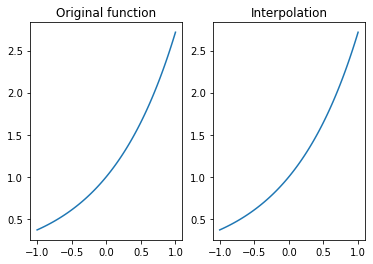

In [9]:
plt.subplot(1,2,1)
plt.plot(np.linspace(-1,1,100), smooth(np.linspace(-1,1,100)))
plt.title("Original function")

plt.subplot(1,2,2)
plt.plot(np.linspace(-1,1,100),test)
plt.title("Interpolation")

Text(0.5, 1.0, 'Interpolation')

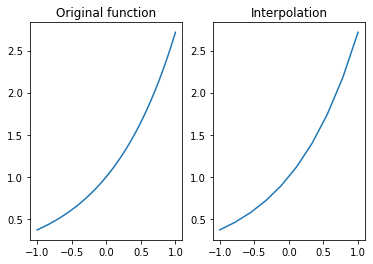

In [10]:
#Testing for the smooth function on [-1, 1] with Chebyshev nodes
x = chebyshev(10)
y = smooth(x)
test = lagInterp(x, y, np.linspace(-1,1,10))
y_true = smooth(np.linspace(-1,1,1000))

plt.subplot(1,2,1)
plt.plot(np.linspace(-1,1,1000), y_true)
plt.title("Original function")

plt.subplot(1,2,2)
plt.plot(np.linspace(-1,1,10), test)
plt.title("Interpolation")

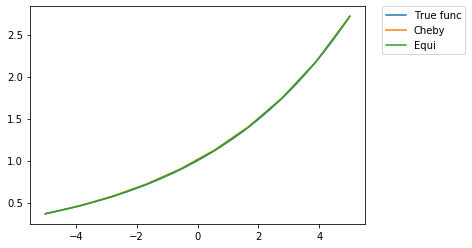

In [11]:
#Testing for the smooth function on [-1, 1] with Chebyshev nodes
x = phi([-5,5], chebyshev(10))
y = smooth(x)
z_1 = np.linspace(-5,5,10) 
z_2 = smooth(z_1)
test = lagInterp(x, y, np.linspace(-1,1,10))
test2 = lagInterp(z_1, z_2, np.linspace(-1,1,10))
y_true = smooth(np.linspace(-1,1,1000))

plt.plot(np.linspace(-5,5,1000), y_true, label = "True func")
plt.plot(np.linspace(-5,5,10), test, label = "Cheby")
plt.plot(np.linspace(-5,5,10), test2, label="Equi")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

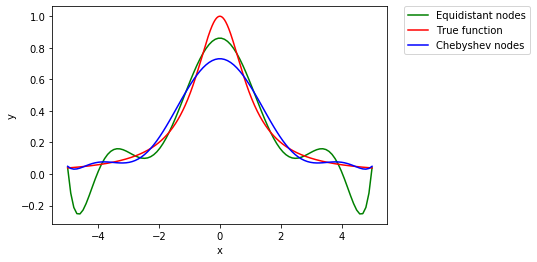

In [12]:
#Implementing for the Runge function on the interval [-5,5] for n=10

#Number of nodes
n = 10

#Generating Chebyshev nodes and points at which the function is known
x_cheb = phi([-5, 5], chebyshev(n))
y_cheb = runge(x_cheb)

#Evaluation points
eval_cheb = np.linspace(-5,5,100)

#Interpolation on Chebyshev nodes
cheb = lagInterp(x_cheb, y_cheb, eval_cheb)

#Generating equidistant nodes and points at which the function is known
x_equi = np.linspace(-5,5, n)
y_equi = runge(x_equi)

#Evaluation points
eval_equi = np.linspace(-5,5,100)

#Interpolation on Chebyshev nodes
equi = lagInterp(x_equi, y_equi, eval_equi)

#True function
x_true = np.linspace(-5,5,1000)
y_true = runge(x_true)

plt.plot(eval_equi, equi, 'g', label = "Equidistant nodes")
plt.plot(x_true, y_true, 'r', label = "True function")
plt.plot(eval_cheb, cheb, 'b', label = "Chebyshev nodes")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig(path+"runge_a_2", bbox_extra_artists=[legend,], bbox_inches='tight')
#Chebyshev nodes converge

Text(0, 0.5, 'y')

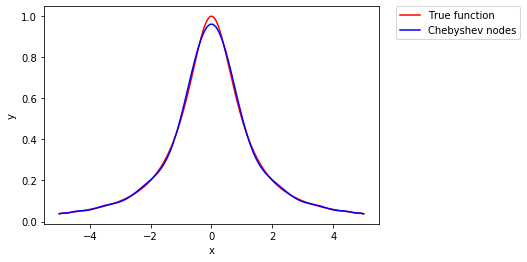

In [13]:
#If we increase n:
#Implementing for the Runge function on the interval [-5,5] for n=20
n = 20
x_cheb = phi([-5, 5], chebyshev(n))
y_cheb = runge(x_cheb)
eval_cheb = np.linspace(-5,5,100)
cheb = lagInterp(x_cheb, y_cheb, eval_cheb)

x_equi = np.linspace(-5,5, n)
y_equi = runge(x_equi)
eval_equi = np.linspace(-5,5,100)
equi = lagInterp(x, y, eval_equi)

x_true = np.linspace(-5,5,1000)
y_true = runge(x_true)
plt.plot(x_true, y_true, 'r', label = "True function")
plt.plot(eval_cheb, cheb, 'b', label = "Chebyshev nodes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("x")
plt.ylabel("y")
#We get good convergence at high n

Text(0, 0.5, 'y')

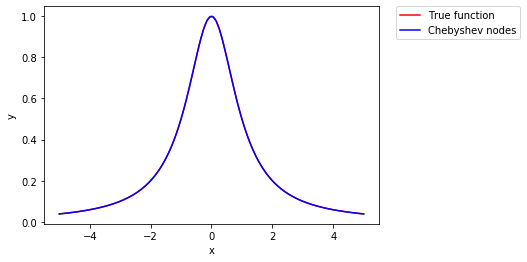

In [14]:
#At a major increase in n, n=50:
n = 50
x_cheb = phi([-5, 5], chebyshev(n))
y_cheb = runge(x_cheb)
eval_cheb = np.linspace(-5,5,100)
cheb = lagInterp(x_cheb, y_cheb, eval_cheb)

x_equi = np.linspace(-5,5, n)
y_equi = runge(x_equi)
eval_equi = np.linspace(-5,5,100)
equi = lagInterp(x, y, eval_equi)

x_true = np.linspace(-5,5,1000)
y_true = runge(x_true)
plt.plot(x_true, y_true, 'r', label = "True function")
plt.plot(eval_cheb, cheb, 'b', label = "Chebyshev nodes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("x")
plt.ylabel("y")
#We get great perormance

### Problem 1b)

In [15]:
#Problem 1b
def f_1(x):
    return np.cos(2*np.pi*x)
    
def f_2(x):
    return (np.exp(3*x))*np.sin(2*x)

In [16]:
def infNorm(function, interpolation):
    """
    
    """
    #Takes in the given function and interpolation of 
    #that function at given points and calculates the max norm
    return np.max(np.abs(function - interpolation))

def twoNorm(function, interpolation, interval):
    #Takes in the given function, interpolation of 
    #that function at given points, and the interval and calculates the two norm
    return (np.sqrt(interval[1]-interval[0])/np.sqrt(len(function)))*((np.sum((function-interpolation)**2))**2)

In [17]:
#Making estimated error plots for equidistant nodes
nVals = np.arange(1, 25, 1)

iNorm = []
tNorm = []
#For function f_1
for n in nVals:
    print("n = ", n)
    nLarge = 100*n
    
    x = np.linspace(0, 1, n)
    y = f_1(x)
    manyPoints = np.linspace(0, 1,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    iNorm += [infNorm(f_1(manyPoints), interpolation)]
    tNorm += [twoNorm(f_1(manyPoints), interpolation, [0,1])]
    

plt.semilogy(nVals, iNorm, 'r', label="Max norm")
plt.semilogy(nVals, tNorm, 'b', label="Two norm")
plt.xlabel("n")
plt.ylabel("Error estimate")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(path+"error_f1_equi", bbox_extra_artists=[legend,], bbox_inches='tight')

n =  1
n =  2
n =  3
n =  4
n =  5
n =  6
n =  7
n =  8
n =  9
n =  10
n =  11
n =  12
n =  13
n =  14
n =  15
n =  16
n =  17


KeyboardInterrupt: 

In [ ]:
#Making estimated error plots for chebyshev nodes
nVals = np.arange(1, 100, 1)

iNorm = []
tNorm = []
#For function f_1
for n in nVals:
    print("n = ", n)
    nLarge = 100*n
    
    x = phi([0,1],chebyshev(n))
    y = f_1(x)
    manyPoints = np.linspace(0, 1,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    iNorm += [infNorm(f_1(manyPoints), interpolation)]
    tNorm += [twoNorm(f_1(manyPoints), interpolation, [0,1])]
    

plt.semilogy(nVals, iNorm, 'r', label="Max norm")
plt.semilogy(nVals, tNorm, 'b', label="Two norm")
plt.xlabel("n")
plt.ylabel("Error estimate")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(path+"error_f1_cheby", bbox_extra_artists=[legend,], bbox_inches='tight')

In [ ]:
#For function f_2 equidistant nodes
nVals = np.arange(1, 25, 1)
iNorm = np.array([])
tNorm = np.array([])
for n in nVals:
    print("This is n", n)
    nLarge = 100*n
    x = np.linspace(0, np.pi/4, n)
    y = f_2(x)
    manyPoints = np.linspace(0, np.pi/4,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    tNorm = np.append(tNorm,twoNorm(f_2(manyPoints), interpolation, [0,1]))
    iNorm = np.append(iNorm,infNorm(f_2(manyPoints), interpolation))
                              


plt.semilogy(nVals, iNorm, 'r', label="Max norm")
plt.semilogy(nVals, tNorm, 'b', label="Two norm")
plt.xlabel("n")
plt.ylabel("Error estimate")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(path+"error_f2_equi", bbox_extra_artists=[legend,], bbox_inches='tight')

In [ ]:
#For function f_2 chebyshev nodes
nVals = np.arange(1, 100, 1)
iNorm = np.array([])
tNorm = np.array([])
for n in nVals:
    print("We are in n", n)
    nLarge = 100*n
    x = phi([0, np.pi/4], chebyshev(n))
    y = f_2(x)
    manyPoints = np.linspace(0, np.pi/4,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    tNorm = np.append(tNorm,twoNorm(f_2(manyPoints), interpolation, [0,1]))
    iNorm = np.append(iNorm,infNorm(f_2(manyPoints), interpolation))
                              


plt.semilogy(nVals, iNorm, 'r', label="Max norm")
plt.semilogy(nVals, tNorm, 'b', label="Two norm")
plt.xlabel("n")
plt.ylabel("Error estimate")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(path+"error_f2_cheby_large_n", bbox_extra_artists=[legend,], bbox_inches='tight')

In [ ]:
#Making estimated error plots for equidistant nodes
nVals = np.arange(1, 25, 1)
iNorm = []
tNorm = []
error_list = []
#For function f_1
for n in nVals:
    print("n = ", n)
    nLarge = 100*n
    
    x = np.linspace(0, 1, n)
    y = f_1(x)
    manyPoints = np.linspace(0, 1,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    iNorm += [infNorm(f_1(manyPoints), interpolation)]
    tNorm += [twoNorm(f_1(manyPoints), interpolation, [0,1])]
    
    #Calculating the error bound
    big_N = np.linspace(0, 1, 100*n)
    x=np.linspace(0,1,n, dtype=float)
    
    func_derivative = (2*np.pi)**(n+1)
    #print("Func_derivativ", func_derivative)
    
    intermediate = 0
    for item in big_N:
        val = 1
        for node in x:
            if(item==node):
                continue
            val *= (item - node)
        #print("Val", val)
        intermediate += np.abs(val)
    
    
    denom = np.math.factorial(n+1)
    final = (func_derivative*intermediate)/denom
    error_list += [final]
    

plt.semilogy(nVals, iNorm, 'r', label="Max norm")
plt.semilogy(nVals, tNorm, 'b', label="Two norm")
plt.semilogy(nVals, error_list, 'g', label = "Error bound")
plt.xlabel("n")
plt.ylabel("Error estimate")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(path+"error_f1_equi_with_error_bound", bbox_extra_artists=[legend,], bbox_inches='tight')

#plt.title("function and derivative")

### Problem 1c)

In [25]:
def pieceWise(numberOfSubintervals, interval, function, nodes=5):
    """
    An implementation of piecewise lagrangian interpolation
    
    Input:
    numberOfSubintervals = number of subintervals in which to divide the interval
    interval = interval of the function
    function = function under consideration
    
    Output:
    solution = an array of interpolated values
    functionPoints = an array of the nodes in each subinterval
    infNorm(...) = the max norm of the method
    twoNorm(...) = the two norm of the method
    """
    
    solution = np.array([])
    functionPoints = np.array([])
    subIntervals = np.linspace(interval[0], interval[1], numberOfSubintervals)
    for i in range(1, len(subIntervals)):
        x = np.linspace(subIntervals[i-1],subIntervals[i],nodes+1)
        y = function(x)
        interpolation = lagInterp(x, y, np.linspace(subIntervals[i-1],subIntervals[i],nodes*10))
        subIntPoints = np.linspace(subIntervals[i-1],subIntervals[i],nodes*10)
        solution = np.append(solution, interpolation)
        functionPoints = np.append(functionPoints, subIntPoints)
    return solution, functionPoints, infNorm(function(functionPoints), solution), twoNorm(function(functionPoints), solution, interval)

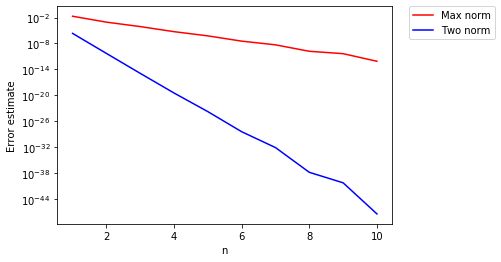

In [26]:
#For n = [1, ..10], we observe the difference in n for K=5 for the interval [1,1] and the runge function
infList = np.array([])
twoList = np.array([])
n_vals = np.arange(1, 11, 1)

for n in n_vals:
    _, _, infl, twol = pieceWise(8, [-1,1], runge, n)
    infList = np.append(infList, infl)
    twoList = np.append(twoList, twol)
plt.semilogy(n_vals, infList, 'r',  label = "Max norm")
plt.semilogy( n_vals, twoList, 'b', label = "Two norm")
plt.xlabel("n")
plt.ylabel("Error estimate")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(path+"error_piecewise_k5", bbox_extra_artists=[legend,], bbox_inches='tight')

We are on k= 2
We are on k= 3
We are on k= 4
We are on k= 5
We are on k= 6
We are on k= 7
We are on k= 8
We are on k= 9
We are on k= 10
We are on k= 11
We are on k= 12
We are on k= 13
We are on k= 14
We are on k= 15
We are on k= 16
We are on k= 17
We are on k= 18
We are on k= 19
We are on k= 20
We are on k= 2
We are on k= 3
We are on k= 4
We are on k= 5
We are on k= 6
We are on k= 7
We are on k= 8
We are on k= 9
We are on k= 10
We are on k= 11
We are on k= 12
We are on k= 13
We are on k= 14
We are on k= 15
We are on k= 16
We are on k= 17
We are on k= 18
We are on k= 19
We are on k= 20
We are on k= 2
We are on k= 3
We are on k= 4
We are on k= 5
We are on k= 6
We are on k= 7
We are on k= 8
We are on k= 9
We are on k= 10
We are on k= 11
We are on k= 12
We are on k= 13
We are on k= 14
We are on k= 15
We are on k= 16
We are on k= 17
We are on k= 18
We are on k= 19
We are on k= 20
We are on k= 2
We are on k= 3
We are on k= 4
We are on k= 5
We are on k= 6
We are on k= 7
We are on k= 8
We are 

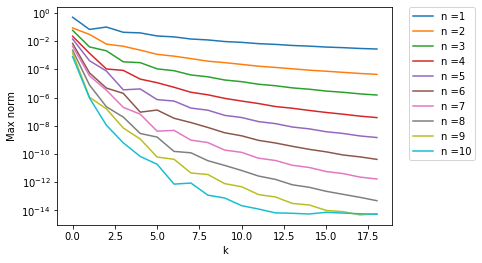

In [27]:
#We observe the behaviour at various n as k goes to infinity for the runge function
    
kVals = np.arange(2, 21)

for n in np.arange(1,11,1):
    normList = np.array([])
    for k in kVals:
        _, _, normval, _ = pieceWise(k, [-1,1], runge, n)
        normList = np.append(normList, normval)
        #print("We are on k=", k)
    plt.semilogy(normList, label="n ="+str(n))
    plt.xlabel("k")
    plt.ylabel("Max norm")
    legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(path+"error, piecewi", bbox_extra_artists=[legend,], bbox_inches='tight')   

In [28]:
#Fixing n=10, we observe the the norm as k goes to infinity
normList = np.array([])
kVals = np.arange(2, 21)
for k in kVals:
    _, _, normval, _ = pieceWise(k, [-1,1], runge, 10)
    normList = np.append(normList, normval)
    #print("We are on k=", k)

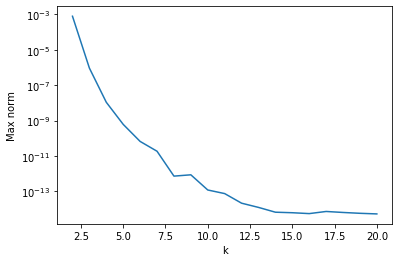

In [29]:
plt.semilogy(kVals, normList)
plt.xlabel("k")
plt.ylabel("Max norm")
plt.savefig(path+"piecewise_n10_kinf")

#### Comparing the methods in b) and c) for k=8 using the runge function

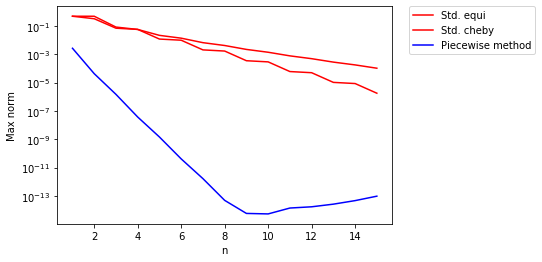

In [31]:
#Comparing max norm
normListStandard = np.array([])
normListPiecewise = np.array([])
normListCheb = np.array([])
nVals = np.arange(1,16, 1)
for n in nVals:
    _, _, normval, _ = pieceWise(k, [-1,1], runge, n)
    normListPiecewise = np.append(normListPiecewise, normval)
    
    nLarge = 100*n
    x = np.linspace(-1, 1, n)
    y = runge(x)
    z1 = chebyshev(n)
    z2 = runge(z1)
    manyPoints = np.linspace(-1, 1,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    cheb = lagInterp(z1, z2, manyPoints)
    normListStandard = np.append(normListStandard, infNorm(runge(manyPoints), interpolation))
    normListCheb = np.append(normListCheb,  infNorm(runge(manyPoints), cheb))

plt.semilogy(nVals, normListStandard, 'r', label = "Std. equi")
plt.semilogy(nVals, normListCheb, 'g', label = "Std. cheby")
plt.semilogy(nVals, normListPiecewise, 'b', label = "Piecewise method")
plt.xlabel("n")
plt.ylabel("Max norm")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(path+"lagrangian_vs_piecewise", bbox_extra_artists=[legend,], bbox_inches='tight')

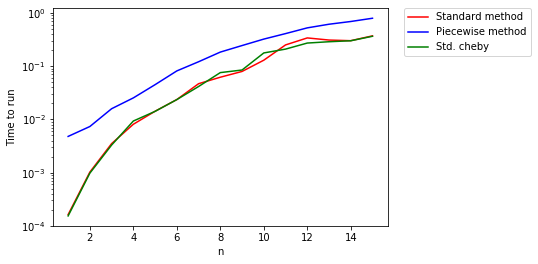

In [32]:
#Comparing time it takes to run each algorithm
time_piecwise = np.array([])
time_lagrangian = np.array([])
time_cheby = np.array([])
nVals = np.arange(1, 16, 1)
for n in nVals:
    piece = time.time()
    _, _, _, _ = pieceWise(k, [-1,1], runge, n)
    time_piecwise = np.append(time_piecwise, time.time() - piece)
    
    nLarge = 100*n
    x = np.linspace(-1, 1, n)
    y = runge(x)
    z1 = chebyshev(n)
    z2 = runge(z1)
    manyPoints = np.linspace(-1, 1,nLarge)
    lagrangian = time.time()
    interpolation = lagInterp(x, y, manyPoints)
    time_lagrangian = np.append(time_lagrangian, time.time() - lagrangian)
    
    cheb_time = time.time()
    cheby = lagInterp(z1, z2, manyPoints)
    time_cheby = np.append(time_cheby, time.time()- cheb_time)
    

plt.semilogy(nVals, time_lagrangian, 'r', label = "Standard method")
plt.semilogy(nVals, time_piecwise, 'b', label = "Piecewise method")
plt.semilogy(nVals, time_cheby, 'g', label = "Std. cheby")
plt.xlabel("n")
plt.ylabel("Time to run")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(path+"lagrangian_vs_piecewise_time", bbox_extra_artists=[legend,], bbox_inches='tight')

### Problem 1d)

In [33]:
import autograd.numpy as np   # Thinly-wrapped version of Numpy
from autograd import grad

In [34]:
#These functions are used for both implementations of gradient descent.

def interp(x, eta, function):
    """
    A more general interpolation function than the one used in earlier problems
    
    Input:
    x = an array of nodes
    eta = an array of values at which to evaluate the interpolation
    function = the function we wish to interpolate
    
    Output:
    poly = the interpolated polynomial evaluated in eta
    """
    
    poly = 0
    for i in range(len(x)):
        li = 1
        for j in range(len(x)):
            if(i==j):
                continue
            if((x[i]-x[j])==0.0):
                print("Divide by 0 at",i,j)
            li = li*((eta-x[j])/(x[i]-x[j]))
        poly += li*function(x[i])
    return poly
        

def cost(x, eta, interval, function):
    """
    The cost function as described in the project document
    
    Input:
    x = an array of nodes
    eta = an array of values at which to evaluate the interpolation
    interval = the interval in which we evaluate the function
    function = the function we wish to interpolate
    
    Output:
    the error of our interpolation
    """
    val = 0
    for i in range(len(eta)):
        val += (function(eta[i])-interp(x, eta[i], function))**2
    return ((interval[1]-interval[0])/len(eta))*val

In [43]:
def project_gd(x, eta, l, down, up, interval, function, max_iter = 100, tol = 1e-10):
    """
    Gradient descent with backtracking implemented along the 
    lines of the pseudocode in the project description
    
    Input:
    x = an array of interpolation nodes
    eta = the x values for which we know function(x)
    l = step length hyperparameter
    down = hyperparameter for reducing step length
    up = hyperparameter for increasing step length
    interval = interval of the function
    function = function under consideration
    max_iter = maximum number of iterations
    tol = tolerance after which we terminate the algorithm
    
    Output:
    an array of interpolation nodes
    """
    
    x = x
    l = l
    interval = interval
    gradient = grad(cost,0)
    p_k = gradient(x, eta, interval, function)
    norm_p_k = np.linalg.norm(p_k)
    grad_norm_list = np.array([norm_p_k])
    costs = np.array(cost(x, eta, interval, function))
    iterations_at_minima = 0
    
    while max_iter>0 and norm_p_k>tol:
        print("We are on iteration", max_iter)
        #print("This is p_k", p_k)
        print("This is the norm", norm_p_k)
        #print("This is x", x)
        new_x = x - (1/l)*p_k
        counter = 0
        while cost(new_x, eta, interval, function) > cost(x, eta, interval, function) + np.dot(p_k,(-(1/l)*p_k)) + (l/2)*(np.linalg.norm(-(1/l)*p_k)**2):
            l = down*l
            new_x = x - (1/l)*p_k
            
        x = new_x
        p_k = gradient(x, eta, interval, function)
        norm_p_k = np.linalg.norm(p_k)
        l = up*l
        max_iter -= 1
        
        costs = np.append(costs, cost(x, eta, interval, function))
        grad_norm_list = np.append(grad_norm_list, np.linalg.norm(p_k))
        if (np.abs(grad_norm_list[-1]-grad_norm_list[-2])<1e-15):
            print("Delta grad is", grad_norm_list[-1]-grad_norm_list[-2])
            print("Delta grad is smaller than 1e-17")
            if(iterations_at_minima >5):
                return x, grad_norm_list, costs
            else:
                iterations_at_minima += 1
        
    return x, grad_norm_list, costs

In [36]:
#x, eta, interval, function, max_iter = 40, tol = 1e-7
def pieceWise_gd(numberOfSubintervals, l, down, up, interval, function, nodes=4):
    """
    An adaptation of the piecewise method in c) which performs 
    gradient descent on the subintervals to find optimal nodes
    
    Input:
    numberOfSubintervals = number of subintervals in which to divide the interval
    l = step size parameter
    down = hyperparameter for reducing step length
    up = hyperparameter for increasing step length
    interval = interval of the function
    function = function under consideration
    
    Output:
    solution = an array of interpolated values
    functionPoints = an array of the nodes in each subinterval
    infNorm(...) = the max norm of the method
    twoNorm(...) = the two norm of the method
    """
    solution = np.array([])
    functionPoints = np.array([])
    subIntervals = np.linspace(interval[0], interval[1], numberOfSubintervals)
    for i in range(1, len(subIntervals)):
        #x = phi([subIntervals[i-1],subIntervals[i]], chebyshev(nodes+1))
        x = np.linspace(subIntervals[i-1],subIntervals[i],nodes+1)
        eta = np.linspace(interval[0], interval[1], 100)
        x, _, _ = project_gd(x, eta, l, down, up, [subIntervals[i-1], subIntervals[i]] , function, 20, 1e-5)      
        y = function(x)
        interpolation = lagInterp(x, y, np.linspace(subIntervals[i-1],subIntervals[i],nodes*10))
        subIntPoints = np.linspace(subIntervals[i-1],subIntervals[i],nodes*10)
        solution = np.append(solution, interpolation)
        functionPoints = np.append(functionPoints, subIntPoints)
    return solution, functionPoints, infNorm(function(functionPoints), solution), twoNorm(function(functionPoints), solution, interval)

In [39]:
#Testing with mildly ill conditioned starting points
x = np.linspace(-1, 1, 6)
eta = np.linspace(0.5,1,100)
l = 1
down =1.5
up = 0.9
ill_conditioned, grad_val, costs = project_gd(x, eta, l, down, up, [-1,1], runge)
ill_conditioned

We are on iteration 5
This is the norm 0.0029459333634937607
We are on iteration 4
This is the norm 0.0027995648092905417
We are on iteration 3
This is the norm 0.0026502067897031197
We are on iteration 2
This is the norm 0.002498724257200128
We are on iteration 1
This is the norm 0.002346055160482124


array([-0.99919214, -0.59847862, -0.19722889,  0.20460312,  0.60966331,
        0.9881041 ])

In [42]:
#Testing with ill conditioned starting points
x = np.linspace(-1, 1, 5)
eta = np.linspace(-2,2,100)
l = 1
down =1.5
up = 0.9
ill_conditioned, grad_val, costs = project_gd(x, eta, l, down, up, [-1,1], runge)
ill_conditioned
#We see that it converges to nodes outside our desired interval

We are on iteration 5
This is the norm 7.345952690788938
We are on iteration 4
This is the norm 2.1223786134687903
We are on iteration 3
This is the norm 1.3351669991717705
We are on iteration 2
This is the norm 0.9443881489378267
We are on iteration 1
This is the norm 0.7085378616427307


array([-1.49080984e+00, -7.85858212e-01, -2.82883658e-16,  7.85858212e-01,
        1.49080984e+00])

In [44]:
#Run with good parameters
x = np.linspace(-1, 1, 5)
eta = np.linspace(-1,1,1000)
l = 1
down =1.5
up = 0.9
x, grad_val, costs = project_gd(x, eta, l, down, up, [-1,1], runge)

We are on iteration 5
This is the norm 0.0023615138112311994
We are on iteration 4
This is the norm 0.002313242753354607
We are on iteration 3
This is the norm 0.0022610279755068885
We are on iteration 2
This is the norm 0.0022047041211833446
We are on iteration 1
This is the norm 0.0021441328974030212


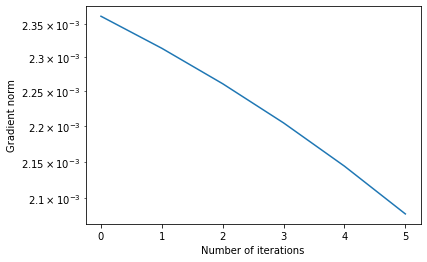

In [45]:
#Plot of the change in gradient
plt.semilogy(grad_val)
plt.xlabel("Number of iterations")
plt.ylabel("Gradient norm")
plt.savefig(path+"gradient_norm_decrease_pgd")

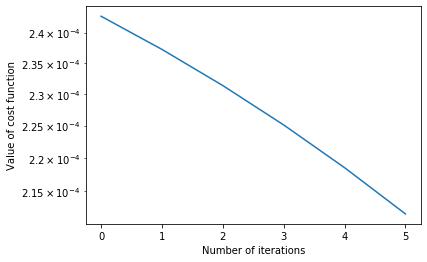

In [46]:
#Plot of the change in cost function
plt.semilogy(costs)
plt.xlabel("Number of iterations")
plt.ylabel("Value of cost function")
plt.savefig(path+"cost_function_decrease_pgd")

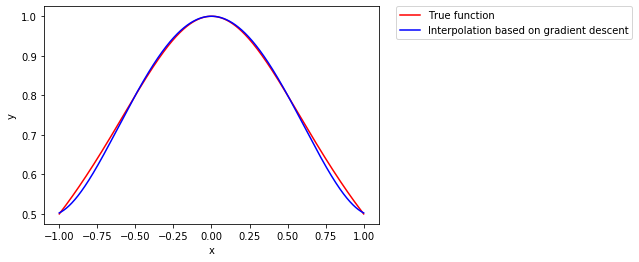

In [47]:
#Plotting the interpolated function versus the true function

x_true = np.linspace(-1,1,1000)
y_true = runge(x_true)
plt.plot(x_true, y_true, 'r', label="True function")
plt.plot(eta, interp(x, eta, runge), 'b', label = "Interpolation based on gradient descent")
plt.xlabel("x")
plt.ylabel("y")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(path+"interpolation_based_on_gd_project", bbox_extra_artists=[legend,], bbox_inches='tight')

In [49]:
#Checking the max norm and the two norm of piecewise interpolation with gradient descent
n_vals = np.arange(2, 11)
l = 1
down =1.5
up = 0.9
i_norm_list = np.array([])
t_norm_list = np.array([])
for n in n_vals:
    _, _, iNorm, tNorm = pieceWise_gd(8, l, down, up, [-1,1], runge, n)
    i_norm_list = np.append(i_norm_list, iNorm)
    t_norm_list = np.append(t_norm_list, tNorm)


We are on iteration 10
This is the norm 0.1337415713156695
We are on iteration 9
This is the norm 0.19879795851080598
We are on iteration 8
This is the norm 0.2614315000701409
We are on iteration 7
This is the norm 0.17693547253156108
We are on iteration 6
This is the norm 0.04938964830340944
We are on iteration 5
This is the norm 0.021365820051696908
We are on iteration 4
This is the norm 0.011157658796636652
We are on iteration 3
This is the norm 0.006423266751990738
We are on iteration 2
This is the norm 0.004130540198329158
We are on iteration 1
This is the norm 0.0031131889962504274
We are on iteration 10
This is the norm 0.2533891304950736
We are on iteration 9
This is the norm 0.14767970624620802
We are on iteration 8
This is the norm 0.05696799442115338
We are on iteration 7
This is the norm 0.025358676929178398
We are on iteration 6
This is the norm 0.012648437369959385
We are on iteration 5
This is the norm 0.006843108374335025
We are on iteration 4
This is the norm 0.0042929

We are on iteration 3
This is the norm 0.0009757017817607346
We are on iteration 2
This is the norm 0.000980454736108494
We are on iteration 1
This is the norm 0.0009857644288751896


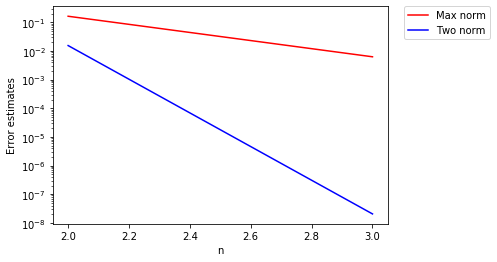

In [50]:
plt.semilogy(n_vals, i_norm_list, 'r', label ="Max norm")
plt.semilogy(n_vals, t_norm_list, 'b', label ="Two norm")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n")
plt.ylabel("Error estimates")
plt.savefig(path+"piecewise_gd_error_project", bbox_extra_artists=[legend,], bbox_inches='tight')
#We see that lagrangian interpolation on the subintervals seems to produce good results

In [52]:
#Comparing to normal piecewise method
#Checking the max norm and the two norm of piecewise interpolation with gradient descent
n_vals = np.arange(2, 11)
l = 1
down =1.5
up = 0.9
i_norm_list = np.array([])
t_norm_list = np.array([])
i_norm_list_gd = np.array([])
t_norm_list_gd = np.array([])
for n in n_vals:
    _, _, max_norm, two_norm = pieceWise(8, [-1,1], runge, n)
    i_norm_list = np.append(i_norm_list, max_norm)
    t_norm_list = np.append(t_norm_list, two_norm)
    
    _, _, iNorm, tNorm = pieceWise_gd(8, l, down, up, [-1,1], runge, n)
    i_norm_list_gd = np.append(i_norm_list_gd, iNorm)
    t_norm_list_gd = np.append(t_norm_list_gd, tNorm)


We are on iteration 10
This is the norm 0.1337415713156695
We are on iteration 9
This is the norm 0.19879795851080598
We are on iteration 8
This is the norm 0.2614315000701409
We are on iteration 7
This is the norm 0.17693547253156108
We are on iteration 6
This is the norm 0.04938964830340944
We are on iteration 5
This is the norm 0.021365820051696908
We are on iteration 4
This is the norm 0.011157658796636652
We are on iteration 3
This is the norm 0.006423266751990738
We are on iteration 2
This is the norm 0.004130540198329158
We are on iteration 1
This is the norm 0.0031131889962504274
We are on iteration 10
This is the norm 0.2533891304950736
We are on iteration 9
This is the norm 0.14767970624620802
We are on iteration 8
This is the norm 0.05696799442115338
We are on iteration 7
This is the norm 0.025358676929178398
We are on iteration 6
This is the norm 0.012648437369959385
We are on iteration 5
This is the norm 0.006843108374335025
We are on iteration 4
This is the norm 0.0042929

We are on iteration 3
This is the norm 0.0009757017817607346
We are on iteration 2
This is the norm 0.000980454736108494
We are on iteration 1
This is the norm 0.0009857644288751896


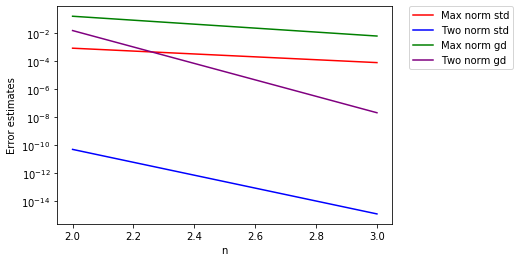

In [54]:
plt.semilogy(n_vals, i_norm_list, 'r', label ="Max norm std")
plt.semilogy(n_vals, t_norm_list, 'b', label ="Two norm std")
plt.semilogy(n_vals, i_norm_list_gd, 'g', label ="Max norm gd")
plt.semilogy(n_vals, t_norm_list_gd, 'purple', label ="Two norm gd")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n")
plt.ylabel("Error estimates")
plt.savefig(path+"piecewise_gd_error_project_vs_std", bbox_extra_artists=[legend,], bbox_inches='tight')
#We see that gradient descent performs poorly compared to the standard method and so will not be
#investigated further

In [58]:
#Comparing all the methods so far for different values of n using the Runge function
n_vals = np.arange(2, 11, 1)

#Arrays tracking the error in max norm of the algorithms
error_equidistant=np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])
error_piecewise = np.array([])

#Arrays for tracking the amount of time spent on each algorithm
time_gd = np.array([])
time_lagrangian = np.array([])
time_chebyshev = np.array([])
time_piecewise = np.array([])

#Value at which the function is known, i.e. f(eta)
eta = np.linspace(-1, 1, 1000)

#Step size parameters
l = 1
down =1.5
up = 0.9
for n in n_vals:
    print("This is n", n)
    
    #Generating nodes
    x = np.linspace(-1,1,n)
    cheb = chebyshev(n)
    
    #Points at which to evaluate the function
    evalu = np.linspace(-1,1, 100)
    
    #Gradient descent
    gd = time.time()
    optimal, _, _= project_gd(x, eta, l, down, up, [-1,1], runge)
    interp_optimal = lagInterp(optimal, runge(optimal), evalu)
    time_gd = np.append(time_gd, time.time()-gd)
    
    #Lagrangian interpolation on equidistant nodes
    lagr = time.time()
    interp_equidistant = lagInterp(x, runge(x), evalu)
    time_lagrangian = np.append(time_lagrangian, time.time()- lagr)
    
    #Lagrangian interpolation on chebyshev nodes
    cheby = time.time()
    interp_chebishev = lagInterp(cheb, runge(cheb), evalu)
    time_chebyshev = np.append(time_chebyshev, time.time()-cheby)
        
    
    #Piecewise interpolation
    piece = time.time()
    _, _, piece_norm, _ = pieceWise(k, [-1,1], runge, n)
    time_piecewise = np.append(time_piecewise, time.time() - piece)
    
    error_equidistant=np.append(error_equidistant, twoNorm(runge(evalu), interp_equidistant, [-1,1]))
    error_chebishev =np.append(error_chebishev, twoNorm(runge(evalu), interp_chebishev, [-1,1]))
    error_optimised =np.append(error_optimised, twoNorm(runge(evalu), interp_optimal, [-1,1]))
    error_piecewise =np.append(error_piecewise, piece_norm)

This is n 2
We are on iteration 5
This is the norm 0.40321010346149316
We are on iteration 4
This is the norm 0.21842683657773215
We are on iteration 3
This is the norm 0.02381758856126482
We are on iteration 2
This is the norm 0.0073682352863047055
We are on iteration 1
This is the norm 0.0017459325687135662
This is n 3
We are on iteration 5
This is the norm 0.026463610445678208
We are on iteration 4
This is the norm 0.024226650976927288
We are on iteration 3
This is the norm 0.021794542126564054
We are on iteration 2
This is the norm 0.01920233803236536
We are on iteration 1
This is the norm 0.016506123902743395


Text(0, 0.5, 'Two norm')

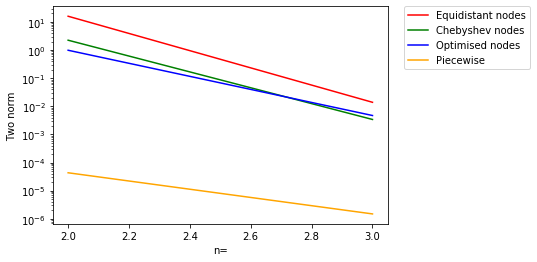

In [59]:
plt.semilogy(n_vals, error_equidistant, 'r', label = "Equidistant nodes")
plt.semilogy(n_vals, error_chebishev,'g', label = "Chebyshev nodes")
plt.semilogy(n_vals, error_optimised, 'b', label="Optimised nodes")
plt.semilogy(n_vals, error_piecewise, 'orange', label="Piecewise")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Two norm")
plt.savefig(path+"error_comparison_of_gd_nodes_with_others_project211", bbox_extra_artists=[legend,], bbox_inches='tight')
    

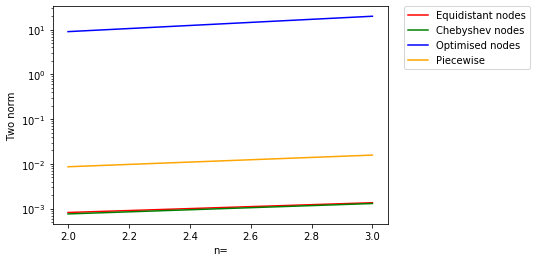

In [60]:
plt.semilogy(n_vals, time_lagrangian, 'r', label = "Equidistant nodes")
plt.semilogy(n_vals, time_chebyshev,'g', label = "Chebyshev nodes")
plt.semilogy(n_vals, time_gd, 'b', label="Optimised nodes")
plt.semilogy(n_vals, time_piecewise, 'orange', label="Piecewise")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Two norm")
plt.savefig(path+"time_comparison_of_gd_with_others_project11", bbox_extra_artists=[legend,], bbox_inches='tight')
#We see that piecewise method is an order of magnitude slower than the standard method
#while GD is three orders of magnitude slower

In [214]:
#Compare results for different values of N for the known function values
#We have chosen n=6 as this is the highest value for n as a compromise between computation time and performance


#Arrays tracking the error in max norm of the algorithms
error_optimised = np.array([])
gradients = np.array([])
cost_list = np.array([])

#Arrays for tracking the amount of time spent on each algorithms
time_gd = np.array([])


large_n = np.array([10, 100, 1000, 2000, 5000])

for et in large_n:
    n=6
    
    #Known function values
    eta = np.linspace(-1,1,et)
    print("This is N", et)
    
    #Generating nodes
    x = np.linspace(-1,1,n)
    cheb = chebyshev(n)
    
    #Points at which to evaluate the function
    evalu = np.linspace(-1,1, 100)
    
    #Gradient descent
    gd = time.time()
    optimal, grads, costs= project_gd(x, eta, l, down, up, [-1,1], runge)
    gradients = np.append(gradients, grads)
    cost_list = np.append(cost_list, costs)
    interp_optimal = lagInterp(optimal, runge(optimal), evalu)
    time_gd = np.append(time_gd, time.time()-gd)
   
    error_optimised =np.append(error_optimised, twoNorm(runge(evalu), interp_optimal, [-1,1]))

This is N 10
We are on iteration 20
This is the norm 0.0004926922744338976
We are on iteration 19
This is the norm 0.0004926197363512286
We are on iteration 18
This is the norm 0.0004922571925333276
We are on iteration 17
This is the norm 0.0004904481390509924
We are on iteration 16
This is the norm 0.00048149460562005276
We are on iteration 15
This is the norm 0.0004390336812576319
We are on iteration 14
This is the norm 0.0002867498711810878
We are on iteration 13
This is the norm 0.00024050837092802986
We are on iteration 12
This is the norm 0.00011047005260159095
We are on iteration 11
This is the norm 6.065864264302579e-05
We are on iteration 10
This is the norm 3.5555199970388854e-05
We are on iteration 9
This is the norm 2.5494291446581048e-05
We are on iteration 8
This is the norm 1.92288087781714e-05
We are on iteration 7
This is the norm 1.0842739826706398e-05
We are on iteration 6
This is the norm 7.925670803543346e-06
We are on iteration 5
This is the norm 4.135356708799647

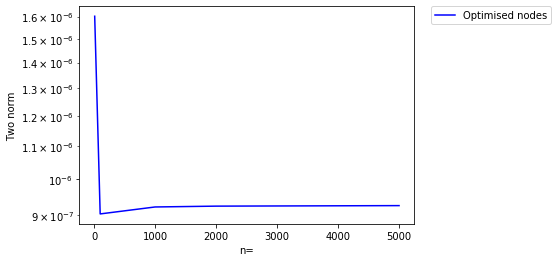

In [215]:
plt.semilogy(large_n, error_optimised, 'b', label="Optimised nodes")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Two norm")
plt.savefig(path+"error_comparison_of_gd_vs_others_for_large_n_10-5000", bbox_extra_artists=[legend,], bbox_inches='tight')

In [216]:
#We explore the range between 10 and 1000 in greater detail
#Arrays tracking the error in max norm of the algorithms
error_optimised = np.array([])
gradients = np.array([])
cost_list = np.array([])

#Arrays for tracking the amount of time spent on each algorithms
time_gd = np.array([])


large_n = np.append(np.array([10]), np.arange(20, 110, 10))
large_n = np.append(large_n, np.arange(200, 1200, 200))

for et in large_n:
    n=6
    
    #Known function values
    eta = np.linspace(-1,1,et)
    print("This is N", et)
    
    #Generating nodes
    x = np.linspace(-1,1,n)
    cheb = chebyshev(n)
    
    #Points at which to evaluate the function
    evalu = np.linspace(-1,1, 100)
    
    #Gradient descent
    gd = time.time()
    optimal, grads, costs= project_gd(x, eta, l, down, up, [-1,1], runge)
    gradients = np.append(gradients, grads)
    cost_list = np.append(cost_list, costs)
    interp_optimal = lagInterp(optimal, runge(optimal), evalu)
    time_gd = np.append(time_gd, time.time()-gd)
   
    error_optimised =np.append(error_optimised, twoNorm(runge(evalu), interp_optimal, [-1,1]))

This is N 10
We are on iteration 20
This is the norm 0.0004926922744338976
We are on iteration 19
This is the norm 0.0004926197363512286
We are on iteration 18
This is the norm 0.0004922571925333276
We are on iteration 17
This is the norm 0.0004904481390509924
We are on iteration 16
This is the norm 0.00048149460562005276
We are on iteration 15
This is the norm 0.0004390336812576319
We are on iteration 14
This is the norm 0.0002867498711810878
We are on iteration 13
This is the norm 0.00024050837092802986
We are on iteration 12
This is the norm 0.00011047005260159095
We are on iteration 11
This is the norm 6.065864264302579e-05
We are on iteration 10
This is the norm 3.5555199970388854e-05
We are on iteration 9
This is the norm 2.5494291446581048e-05
We are on iteration 8
This is the norm 1.92288087781714e-05
We are on iteration 7
This is the norm 1.0842739826706398e-05
We are on iteration 6
This is the norm 7.925670803543346e-06
We are on iteration 5
This is the norm 4.135356708799647

We are on iteration 9
This is the norm 6.558763084289177e-06
We are on iteration 8
This is the norm 3.556886303516892e-06
We are on iteration 7
This is the norm 2.159280975658422e-06
We are on iteration 6
This is the norm 9.086398150800306e-07
We are on iteration 5
This is the norm 2.9339591172968464e-07
We are on iteration 4
This is the norm 7.610562306464926e-08
We are on iteration 3
This is the norm 4.0632328568821675e-08
We are on iteration 2
This is the norm 2.043740869866656e-08
We are on iteration 1
This is the norm 1.1579137504731117e-08
This is N 350
We are on iteration 20
This is the norm 0.0009466406008476639
We are on iteration 19
This is the norm 0.000946542072971322
We are on iteration 18
This is the norm 0.0009460495405957649
We are on iteration 17
This is the norm 0.0009435895516404836
We are on iteration 16
This is the norm 0.0009313561514081642
We are on iteration 15
This is the norm 0.0008718184876684625
We are on iteration 14
This is the norm 0.0006109049197387948
W

We are on iteration 17
This is the norm 0.0009450947676396343
We are on iteration 16
This is the norm 0.0009329454914325172
We are on iteration 15
This is the norm 0.0008738171863052408
We are on iteration 14
This is the norm 0.0006146812102175007
We are on iteration 13
This is the norm 0.0001108743708859567
We are on iteration 12
This is the norm 4.2232525745438475e-05
We are on iteration 11
This is the norm 2.171085868688265e-05
We are on iteration 10
This is the norm 1.1632428441468397e-05
We are on iteration 9
This is the norm 6.254277248208759e-06
We are on iteration 8
This is the norm 3.445036482349507e-06
We are on iteration 7
This is the norm 1.9338510123940173e-06
We are on iteration 6
This is the norm 9.312865541078697e-07
We are on iteration 5
This is the norm 4.9505502315552e-07
We are on iteration 4
This is the norm 2.7399371351419077e-07
We are on iteration 3
This is the norm 1.3288130333781722e-07
We are on iteration 2
This is the norm 7.92068400346805e-08
We are on iter

We are on iteration 5
This is the norm 1.3322836717201022e-07
We are on iteration 4
This is the norm 7.35071553955988e-08
We are on iteration 3
This is the norm 3.607492910925869e-08
We are on iteration 2
This is the norm 2.111663689034653e-08
We are on iteration 1
This is the norm 9.869489143036422e-09
This is N 1000
We are on iteration 20
This is the norm 0.0009486908165617671
We are on iteration 19
This is the norm 0.0009485932458032224
We are on iteration 18
This is the norm 0.0009481054979860761
We are on iteration 17
This is the norm 0.0009456694060670139
We are on iteration 16
This is the norm 0.0009335548488757268
We are on iteration 15
This is the norm 0.0008745955534197746
We are on iteration 14
This is the norm 0.0006161956377106264
We are on iteration 13
This is the norm 0.00011278763296879746
We are on iteration 12
This is the norm 4.1460648940272944e-05
We are on iteration 11
This is the norm 2.1301613552630914e-05
We are on iteration 10
This is the norm 1.141567849739552

Text(0, 0.5, 'Two norm')

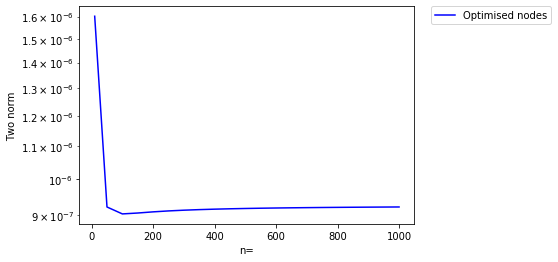

In [217]:
plt.semilogy(large_n, error_optimised, 'b', label="Optimised nodes")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Two norm")
plt.savefig(path+"error_comparison_of_gd_vs_others_for_large_n_project_10-1000", bbox_extra_artists=[legend,], bbox_inches='tight')

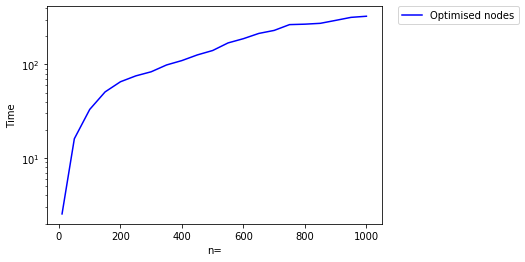

In [222]:
plt.semilogy(large_n, time_gd, 'b', label="Optimised nodes")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Time")
plt.savefig(path+"time_comparison_of_gd_with_others_for_large_n_project10-1000", bbox_extra_artists=[legend,], bbox_inches='tight')

#### Gradient descent with Armijo backtracking

In [62]:
def new_gradient_descent(x, eta, interval, function, max_iter = 100, tol = 1e-7):
    """
    Gradient descent with armijo backtracking
    
    Input:
    x = an array of nodes
    eta = an array of values at which to evaluate the interpolation
    interval = the interval in which we evaluate the function
    function = the function we wish to interpolate
    max_iter = maximum number of iterations after which we return the current solution
    tol = tolerance which we compare the norm of the gradient to to determine when we exit the algorithm
    
    Output:
    x = an array of nodes
    cost_list = a list of the values of the cost function at each iteration
    norm_list = a list of the norm of the gradient of the cost function at each iteration
    """
    
    c = 1e-4
    gradient = grad(cost, 0)
    
    #Descent direction
    p_k = -(gradient(x, eta, interval, function))
    
    cost_val = cost(x, eta, interval, function)
    cost_list = np.array([cost_val])
    norm_p_k = np.linalg.norm(p_k)
    norm_list = np.array([norm_p_k])
    
    iterations_at_minima = 0
    
    while norm_p_k>tol and max_iter > 0:
        #Step size
        alpha = 10
        
        
        print("We are counting down from iteration", max_iter)
        print("This is norm", norm_p_k)
        print("This is x", x)
        
        #Armijo condition
        rhs = (cost_val+c*alpha*((-p_k.T)@p_k))
        while(cost(x+alpha*p_k, eta, interval, function))>rhs:
            #print("We are in backtrack", alpha)
            alpha = alpha*0.5
            rhs = (cost_val+c*alpha*((-p_k.T)@p_k))
            
        #Take a step
        x = x + alpha*p_k
        cost_val = cost(x, eta, interval, function)
        
        #New search direction
        p_k = -(gradient(x, eta, interval, function))
        norm_p_k = np.linalg.norm(p_k)
        
        norm_list = np.append(norm_list, norm_p_k)
        cost_list = np.append(cost_list, cost_val)
        max_iter-=1
        
        
        #In case we struggle to mo
        if (np.abs(norm_list[-1]-norm_list[-2])<1e-20):
            print("Delta grad is", norm_list[-1]-norm_list[-2])
            print("Delta grad is smaller than 1e-17")
            if(iterations_at_minima >5):
                return x, norm_list, cost_list
            else:
                iterations_at_minima += 1
        
    return x, norm_list, cost_list

In [63]:
#Testing with mildly ill conditioned starting points
x = np.linspace(-1, 1, 5)
eta = np.linspace(0.5,1,100)
ill_conditioned, grad_val, costs = new_gradient_descent(x, eta, [-1,1], runge)
#We see that it converges to points slightly outside our desired interval

We are counting down from iteration 5
This is norm 0.006959304310451877
This is x [-1.  -0.5  0.   0.5  1. ]
We are counting down from iteration 4
This is norm 0.0017903388508435025
This is x [-1.00530577e+00 -5.05892740e-01 -2.78913722e-18  5.29203124e-01
  9.37330281e-01]
We are counting down from iteration 3
This is norm 0.0011688504729740826
This is x [-1.00735761e+00 -5.08221873e-01 -1.53355432e-04  5.42115665e-01
  9.25324485e-01]
We are counting down from iteration 2
This is norm 0.0010305402831884013
This is x [-1.00907523e+00 -5.10166395e-01 -2.77032122e-04  5.53046187e-01
  9.22099864e-01]
We are counting down from iteration 1
This is norm 0.0009577449235493242
This is x [-1.01061583e+00 -5.11903144e-01 -3.60219077e-04  5.63070794e-01
  9.21541380e-01]


In [65]:
#Testing with ill conditioned starting points
x = np.linspace(-1, 1, 5)
eta = np.linspace(-2,2,100)
ill_conditioned, grad_val, costs = new_gradient_descent(x, eta, [-1,1], runge)

We are counting down from iteration 5
This is norm 7.345952690788938
This is x [-1.  -0.5  0.   0.5  1. ]
We are counting down from iteration 4
This is norm 0.00025285732636316267
This is x [-4.54222930e+01 -2.74223128e+01 -3.10862447e-14  2.74223128e+01
  4.54222930e+01]
We are counting down from iteration 3
This is norm 0.00025290344915038373
This is x [-4.54219093e+01 -2.74205665e+01 -1.13588263e-12  2.74205665e+01
  4.54219093e+01]
We are counting down from iteration 2
This is norm 0.0002529495925767612
This is x [-4.54215256e+01 -2.74188199e+01 -4.15770025e-11  2.74188199e+01
  4.54215256e+01]
We are counting down from iteration 1
This is norm 0.0002529957567146307
This is x [-4.54211418e+01 -2.74170729e+01 -1.52192272e-09  2.74170729e+01
  4.54211418e+01]


In [66]:
eta = np.linspace(-1, 1, 1000)
x = np.linspace(-1,1,6)

In [67]:
interp_gd, grad_val, costs = new_gradient_descent(x, eta, [-1,1], runge)

We are counting down from iteration 5
This is norm 0.0009486908165617671
This is x [-1.  -0.6 -0.2  0.2  0.6  1. ]
We are counting down from iteration 4
This is norm 0.0008529264097663063
This is x [-0.99398486 -0.60284451 -0.20085298  0.20085298  0.60284451  0.99398486]
We are counting down from iteration 3
This is norm 0.000770013350128638
This is x [-0.98853659 -0.60531518 -0.2016187   0.2016187   0.60531518  0.98853659]
We are counting down from iteration 2
This is norm 0.0006976150510389784
This is x [-0.98358713 -0.60747572 -0.20231219  0.20231219  0.60747572  0.98358713]
We are counting down from iteration 1
This is norm 0.0006339340669064142
This is x [-0.97907973 -0.60937724 -0.2029454   0.2029454   0.60937724  0.97907973]


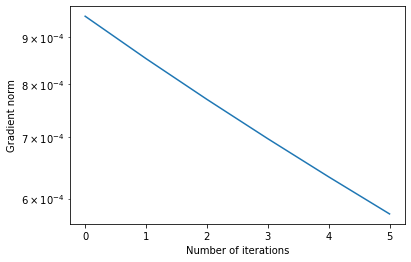

In [68]:
#Plot of the change in gradient
plt.semilogy(grad_val)
plt.xlabel("Number of iterations")
plt.ylabel("Gradient norm")
#plt.savefig(path+"gradient_norm_decrease")

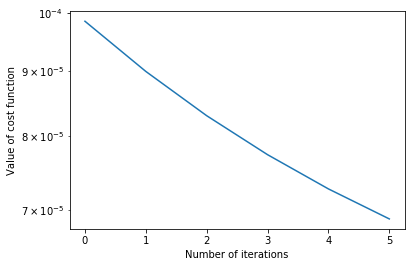

In [69]:
#Plot of the change in cost function
plt.semilogy(costs)
plt.xlabel("Number of iterations")
plt.ylabel("Value of cost function")
#plt.savefig(path+"cost_function_decrease")

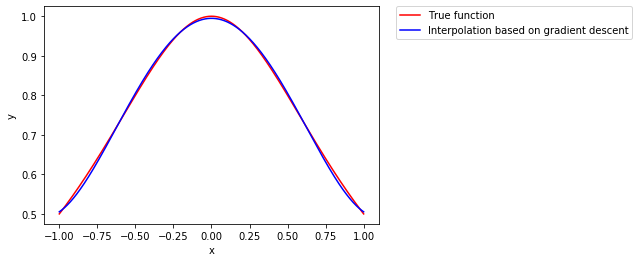

In [70]:
#Plotting the interpolation function versus the true function

x_true = np.linspace(-1,1,1000)
y_true = runge(x_true)
plt.plot(x_true, y_true, 'r', label="True function")
plt.plot(eta, interp(interp_gd, eta, runge), 'b', label = "Interpolation based on gradient descent")
plt.xlabel("x")
plt.ylabel("y")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.savefig(path+"interpolation_based_on_gd", bbox_extra_artists=[legend,], bbox_inches='tight')

In [75]:
#Compare results for different values of n for the runge function
n_vals = np.arange(2, 11, 1)

#Arrays tracking the error in max norm of the algorithms
error_equidistant=np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])
error_piecewise = np.array([])

#Arrays for tracking the amount of time spent on each algorithms
time_gd = np.array([])
time_lagrangian = np.array([])
time_chebyshev = np.array([])
time_piecewise = np.array([])

eta = np.linspace(-1, 1, 1000)

for n in n_vals:
    print("This is n", n)
    x = np.linspace(-1,1,n)
    cheb = chebyshev(n)
    evalu = np.linspace(-1,1, 100)
    
    gd = time.time()
    optimal, _, _= new_gradient_descent(x, eta, [-1,1], runge)
    interp_optimal = lagInterp(optimal, runge(optimal), evalu)
    time_gd = np.append(time_gd, time.time()-gd)
    
    lagr = time.time()
    interp_equidistant = lagInterp(x, runge(x), evalu)
    time_lagrangian = np.append(time_lagrangian, time.time()- lagr)
    
    cheby = time.time()
    interp_chebishev = lagInterp(cheb, runge(cheb), evalu)
    time_chebyshev = np.append(time_chebyshev, time.time()-cheby)
        
    
    
    piece = time.time()
    _, _, piece_norm, _ = pieceWise(k, [-1,1], runge, n)
    time_piecewise = np.append(time_piecewise, time.time() - piece)
    
    error_equidistant=np.append(error_equidistant, twoNorm(runge(evalu), interp_equidistant, [-1,1]))
    error_chebishev =np.append(error_chebishev, twoNorm(runge(evalu), interp_chebishev, [-1,1]))
    error_optimised =np.append(error_optimised, twoNorm(runge(evalu), interp_optimal, [-1,1]))
    error_piecewise =np.append(error_piecewise, piece_norm)

    

This is n 2
We are counting down from iteration 5
This is norm 0.40321010346149316
This is x [-1.  1.]
We are counting down from iteration 4
This is norm 0.10622135828136883
This is x [ 0.42556299 -0.42556299]
We are counting down from iteration 3
This is norm 0.10710717780478624
This is x [ 0.6133376 -0.6133376]
We are counting down from iteration 2
This is norm 0.005282941522822171
This is x [ 0.51866733 -0.51866733]
We are counting down from iteration 1
This is norm 0.00020102611383564993
This is x [ 0.52333684 -0.52333684]
This is n 3
We are counting down from iteration 5
This is norm 0.026463610445678208
This is x [-1.  0.  1.]
We are counting down from iteration 4
This is norm 0.0029938110628705385
This is x [-8.12874016e-01  2.91379334e-18  8.12874016e-01]
We are counting down from iteration 3
This is norm 0.0011327848691416657
This is x [-8.34043457e-01 -2.21516056e-16  8.34043457e-01]
We are counting down from iteration 2
This is norm 0.00040566652712885294
This is x [-8.26033

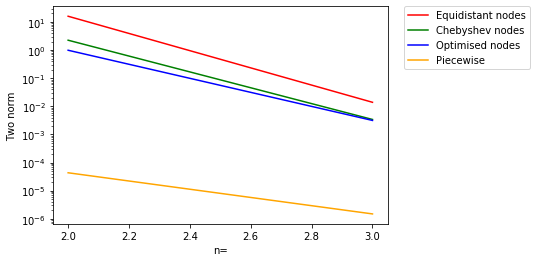

In [76]:
plt.semilogy(n_vals, error_equidistant, 'r', label = "Equidistant nodes")
plt.semilogy(n_vals, error_chebishev,'g', label = "Chebyshev nodes")
plt.semilogy(n_vals, error_optimised, 'b', label="Optimised nodes")
plt.semilogy(n_vals, error_piecewise, 'orange', label="Piecewise")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Two norm")
#plt.savefig(path+"error_comparison_of_gd_nodes_with_others", bbox_extra_artists=[legend,], bbox_inches='tight')

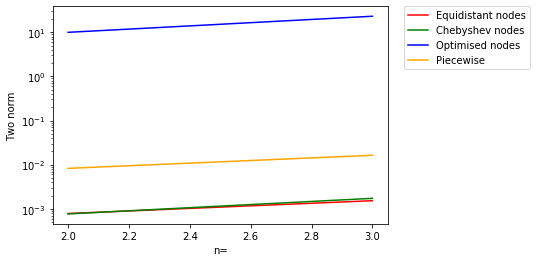

In [78]:
plt.semilogy(n_vals, time_lagrangian, 'r', label = "Equidistant nodes")
plt.semilogy(n_vals, time_chebyshev,'g', label = "Chebyshev nodes")
plt.semilogy(n_vals, time_gd, 'b', label="Optimised nodes")
plt.semilogy(n_vals, time_piecewise, 'orange', label="Piecewise")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Two norm")
#plt.savefig(path+"time_comparison_of_gd_with_others", bbox_extra_artists=[legend,], bbox_inches='tight')

In [154]:
columns = ["Equidistant nodes", "Chebyshev nodes", "Piecewise", "Gradient descent"]
df = pd.DataFrame(index = n_vals)
df["Equidistant nodes"] = time_lagrangian
df["Chebyshev nodes"] = time_chebyshev
df["Gradient descent"] = time_gd
df["Piecewise"] = time_piecewise

In [155]:
df

,Equidistant nodes,Chebyshev nodes,Gradient descent,Piecewise
2,0.000511,0.000512,17.190813,0.006783
3,0.001215,0.001107,63.539789,0.014628
4,0.003278,0.003139,159.609930,0.045787
5,0.003314,0.003101,284.920317,0.045171
6,0.005432,0.004303,413.136083,0.065428
7,0.005938,0.005850,494.023341,0.103104
8,0.008374,0.007354,756.221959,0.143019
9,0.011653,0.009602,998.804214,0.218054
10,0.011950,0.012364,1191.338309,0.287076


In [81]:
#We explore the range between 10 and 1000 in greater detail
#Arrays tracking the error in max norm of the algorithms
error_optimised = np.array([])
gradients = np.array([])
cost_list = np.array([])

#Arrays for tracking the amount of time spent on each algorithms
time_gd = np.array([])


large_n = np.append(np.array([10]), np.arange(20, 110, 10))
large_n = np.append(large_n, np.arange(200, 1200, 200))

for et in large_n:
    n=6
    
    #Known function values
    eta = np.linspace(-1,1,et)
    print("This is N", et)
    
    #Generating nodes
    x = np.linspace(-1,1,n)
    cheb = chebyshev(n)
    
    #Points at which to evaluate the function
    evalu = np.linspace(-1,1, 100)
    
    #Gradient descent
    gd = time.time()
    optimal, grads, costs= new_gradient_descent(x, eta, [-1,1], runge)
    gradients = np.append(gradients, grads)
    cost_list = np.append(cost_list, costs)
    interp_optimal = lagInterp(optimal, runge(optimal), evalu)
    time_gd = np.append(time_gd, time.time()-gd)
   
    error_optimised =np.append(error_optimised, twoNorm(runge(evalu), interp_optimal, [-1,1]))

This is N 10
We are counting down from iteration 5
This is norm 0.0004926922744338976
This is x [-1.  -0.6 -0.2  0.2  0.6  1. ]
We are counting down from iteration 4
This is norm 0.0004230074100977007
This is x [-0.99742338 -0.60224813 -0.20066649  0.20066649  0.60224813  0.99742338]
We are counting down from iteration 3
This is norm 0.000371200177478617
This is x [-0.9954032  -0.60435944 -0.20130524  0.20130524  0.60435944  0.9954032 ]
We are counting down from iteration 2
This is norm 0.0003326110700175631
This is x [-0.99381799 -0.60635852 -0.2019219   0.2019219   0.60635852  0.99381799]
We are counting down from iteration 1
This is norm 0.0003036223538932512
This is x [-0.99257351 -0.6082624  -0.20252025  0.20252025  0.6082624   0.99257351]
This is N 15
We are counting down from iteration 5
This is norm 0.0007120722743949121
This is x [-1.  -0.6 -0.2  0.2  0.6  1. ]
We are counting down from iteration 4
This is norm 0.0006099865484272601
This is x [-0.99575786 -0.60259848 -0.200777

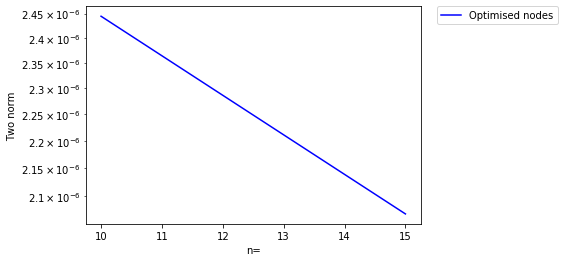

In [82]:
plt.semilogy(large_n, error_optimised, 'b', label="Optimised nodes")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Two norm")
#plt.savefig(path+"error_comparison_of_gd_vs_others_for_large_n", bbox_extra_artists=[legend,], bbox_inches='tight')

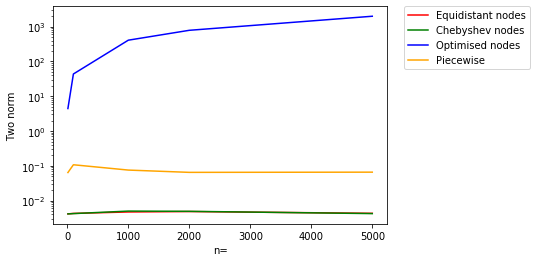

In [159]:
plt.semilogy(large_n, time_gd, 'b', label="Optimised nodes")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Two norm")
#plt.savefig(path+"time_comparison_of_gd_with_others_for_large_n", bbox_extra_artists=[legend,], bbox_inches='tight')

### Problem 1e)

In [83]:

def psi(x, shape):
    return np.exp(-((shape*x)**2))

def f_aprox(x, shape, eta, function):
    """
    An interpolation function based on radial basis functions
    
    Input: 
    x = an array of nodes
    shape = a shape parameter
    eta = an array of values in which to evaluate the interpolation
    function = the function under consideration
    
    Output:
    approx = An interpolion of the function at the values of eta
    
    """
    
    m = np.array([])
    for i in range(len(x)):
        mi = np.array([])
        for j in range(len(x)):
            mi = np.append(mi, psi(np.abs(x[i]-x[j]), shape))
        if(i==0):
            m = mi
        else:
            m = np.vstack((m, mi))
    f = function(x)
    w = np.linalg.solve(m,f)
    approx = 0
    for i in range(len(x)):
        approx += w[i]*psi(np.abs(eta-x[i]), shape)
    return approx



def cost2(x, shape, eta, interval, function):
    """
    The cost function for RBF interpolation
    
    Input: 
    x = an array of nodes
    shape = a shape parameter
    eta = an array of values in which to evaluate the interpolation
    function = the function under consideration
    
    Output:
    the cost with the current set of nodes 
    
    """
    
    cost_val = 0
    func_eta = function(eta)
    aprox = np.array([])
    for i in range(len(eta)):
        #print("Iteration", i, f_aprox(x, shape, eta[i], function))
        aprox = np.append(aprox, f_aprox(x, shape, eta[i], function))
    aprox = np.sum((func_eta-aprox)**2)
    return ((interval[1]-interval[0])/len(eta))*aprox
  
def f_3(x):
    """
    The third function given in the project description
    """
    return 0.75*(np.exp((-(9*x-2)**2)/4)+np.exp((-(9*x+1)**2)/49))+0.5*np.exp((-(9*x-7)**2)/4)-0.1*np.exp(-(9*x-4)**2)
    

In [84]:
def piecewise_rbf(numberOfSubintervals, interval, function, shape, nodes=5):
    solution = np.array([])
    functionPoints = np.array([])
    subIntervals = np.linspace(interval[0], interval[1], numberOfSubintervals)
    for i in range(1, len(subIntervals)):
        x = np.linspace(subIntervals[i-1],subIntervals[i],nodes+1)
        eta = np.linspace(subIntervals[i-1],subIntervals[i], nodes*10)
        interpolation = f_aprox(x, shape, eta, function)
        subIntPoints = np.linspace(subIntervals[i-1],subIntervals[i],nodes*10)
        solution = np.append(solution, interpolation)
        functionPoints = np.append(functionPoints, subIntPoints)
    return solution, functionPoints, infNorm(function(functionPoints), solution), twoNorm(function(functionPoints), solution, interval)

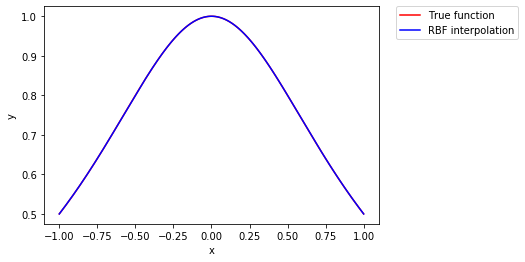

In [85]:
#Testing if our radial basis function works
x_true = np.linspace(-1,1,1000)
y_true = runge(x_true)

x = np.linspace(-1,1,10)
eta = np.linspace(-1,1,1000)

plt.plot(x_true, y_true, 'r', label = "True function")
plt.plot(eta, f_aprox(x, 1.5, eta, runge), 'b', label = "RBF interpolation")
plt.xlabel("x")
plt.ylabel("y")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(path+"RBF_runge", bbox_extra_artists=[legend,], bbox_inches='tight')

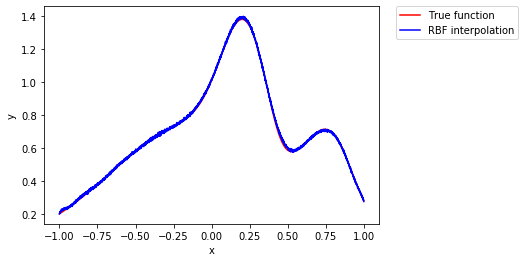

In [86]:
#Testing f_3, we see that we require a large n and eta for it to converge satisfactoraly
x_true = np.linspace(-1,1,1000)
y_true = f_3(x_true)

x = np.linspace(-1,1,40)
eta = np.linspace(-1,1,4000)

plt.plot(x_true, y_true, 'r', label = "True function")
plt.plot(eta, f_aprox(x, 1.5, eta, f_3), 'b', label = "RBF interpolation")
plt.xlabel("x")
plt.ylabel("y")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(path+"RBF_f3", bbox_extra_artists=[legend,], bbox_inches='tight')

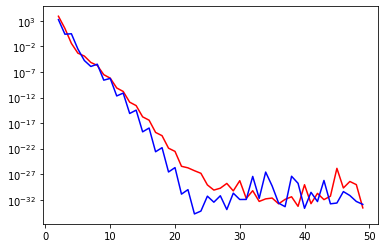

In [87]:
#Looking at how n affects the 2 norm for the runge function
#Finding the best shape parameters to use as initial conditions for our algorithm. runge
norms_equi = np.array([])
norms_cheb = np.array([])

eta = np.linspace(-1,1,1000)
shape = 2
nVals = np.arange(2, 50, 1)
for n in nVals:
    x = np.linspace(-1,1,n)
    y = chebyshev(n)
    norms_equi = np.append(norms_equi, twoNorm(runge(eta), f_aprox(x, shape, eta, runge), [-1,1]))
    norms_cheb = np.append(norms_cheb, twoNorm(runge(eta), f_aprox(y, shape, eta, runge), [-1,1]))
plt.semilogy(nVals, norms_equi, 'r', nVals, norms_cheb, 'b')

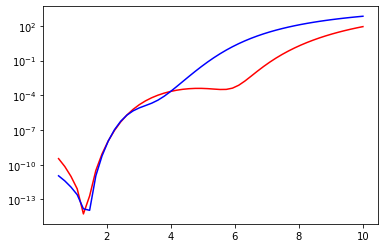

In [88]:
#Finding the best shape parameters to use as initial conditions for our algorithm. runge
norms_equi = np.array([])
norms_cheb = np.array([])
x = np.linspace(-1,1,10)
y = chebyshev(10)
eta = np.linspace(-1,1,1000)
for shape in np.linspace(0.5, 10.0, 50):
    norms_equi = np.append(norms_equi, twoNorm(runge(eta), f_aprox(x, shape, eta, runge), [-1,1]))
    norms_cheb = np.append(norms_cheb, twoNorm(runge(eta), f_aprox(y, shape, eta, runge), [-1,1]))
plt.semilogy(np.linspace(0.5, 10.0, 50), norms_equi, 'r', np.linspace(0.5, 10.0, 50), norms_cheb, 'b')

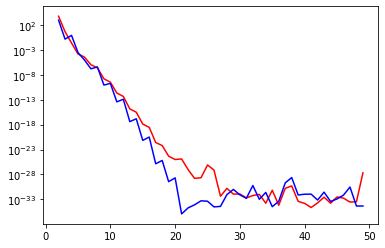

In [89]:
#Looking at the behaviour of the rbf as n increases
norms_equi = np.array([])
norms_cheb = np.array([])
n_vals = np.arange(2, 50, 1)
eta = np.linspace(-1,1,1000)
for n in n_vals:
    x = np.linspace(-1,1,n)
    y = chebyshev(n)
    norms_equi = np.append(norms_equi, twoNorm(runge(eta), f_aprox(x, 1.8, eta, runge), [-1,1]))
    norms_cheb = np.append(norms_cheb, twoNorm(runge(eta), f_aprox(y, 1.8, eta, runge), [-1,1]))
plt.semilogy(n_vals, norms_equi, 'r', n_vals, norms_cheb, 'b')

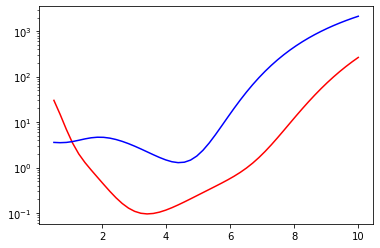

In [90]:
#Finding the best shape parameters to use as initial conditions for our algorithm. f_3 with 10 nodes
norms_equi = np.array([])
norms_cheb = np.array([])
x = np.linspace(-1,1,10)
y = chebyshev(10)
eta = np.linspace(-1,1,2000)
for shape in np.linspace(0.5, 10.0, 50):
    norms_equi = np.append(norms_equi, twoNorm(f_3(eta), f_aprox(x, shape, eta, f_3), [-1,1]))
    norms_cheb = np.append(norms_cheb, twoNorm(f_3(eta), f_aprox(y, shape, eta, f_3), [-1,1]))
plt.semilogy(np.linspace(0.5, 10.0, 50), norms_equi, 'r', np.linspace(0.5, 10.0, 50), norms_cheb, 'b')

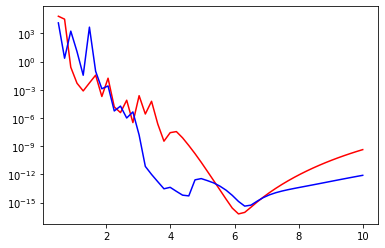

In [91]:
#Finding the best shape parameters to use as initial conditions for our algorithm. f_3 with 40 nodes
norms_equi = np.array([])
norms_cheb = np.array([])
x = np.linspace(-1,1,40)
y = chebyshev(40)
eta = np.linspace(-1,1,2000)
for shape in np.linspace(0.5, 10.0, 50):
    norms_equi = np.append(norms_equi, twoNorm(f_3(eta), f_aprox(x, shape, eta, f_3), [-1,1]))
    norms_cheb = np.append(norms_cheb, twoNorm(f_3(eta), f_aprox(y, shape, eta, f_3), [-1,1]))
plt.semilogy(np.linspace(0.5, 10.0, 50), norms_equi, 'r', np.linspace(0.5, 10.0, 50), norms_cheb, 'b')

In [ ]:
#From this we can surmise that the optimal shape parameter lies somewhere between 1 and 2 for the runge
#function and between 4 and 6 for f_3

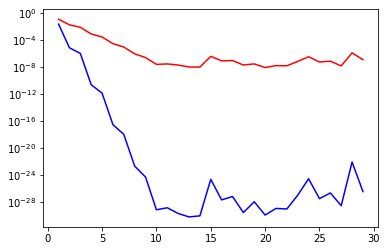

In [92]:
#Testing the piecewise rbf function for different values of n
infList = np.array([])
twoList = np.array([])
n_vals = np.arange(1, 30, 1)

for n in n_vals:
    _, _, infl, twol = piecewise_rbf(8, [-1,1], runge, 4.0, n)
    infList = np.append(infList, infl)
    twoList = np.append(twoList, twol)
plt.semilogy(n_vals, infList, 'r', n_vals, twoList, 'b')

In [131]:
def gradient_descent2(x, shape, eta, interval, function, max_iter = 100, tol = 1e-15):
    x = x
    shape = shape
    c = 1e-4
    gradient = grad(cost2,(0,1))
    x, shape, eta, interval, function
    combined = gradient(x,shape, eta, interval, function)
    p_k = -np.append(combined[0], combined[1])
    norm_p_k = np.linalg.norm(p_k)
    grad_norm_list = np.array([norm_p_k])
    costs = np.array(cost2(x, shape, eta, interval, function))
    iterations_at_minima = 0
    
    while max_iter>0 and norm_p_k>tol:
        print("We are on iteration", max_iter)
        print("This is shape", shape)
        #print("This is p_k", p_k)
        print("This is the norm", norm_p_k)
        print("This is x", x)
        alpha = (len(x)**7)
        #test_val = gradient(x,shape, eta, interval, function)
        #test_comb = -np.append(test_val[0], test_val[1])
        #print("Negative Test Comb", -test_comb)
        #test_grad = -test_comb@test_comb
        #print(c*alpha*test_grad)
        
        while cost2(x+alpha*p_k[:-1],shape + alpha*p_k[-1], eta, interval, function)>(cost2(x, shape, eta, interval, function)+c*alpha*(-p_k@p_k)):
            #print("We are on alpha", alpha)
            if(alpha<1e-25):
                break
            #print("Cost before step", (cost2(x, shape, eta, interval, function)))
            #print("Cost after step", cost2(x+alpha*p_k[:-1],shape + alpha*p_k[-1], eta, interval, function))
            alpha = 0.5*alpha
        print("This alpha got through", alpha)
        x = x + alpha*p_k[:-1]
        shape = shape + alpha*p_k[-1]
        combined = gradient(x,shape, eta, interval, function)
        p_k = -np.append(combined[0], combined[1])
        norm_p_k = np.linalg.norm(p_k)
        max_iter -= 1
        
        grad_norm_list = np.append(grad_norm_list, norm_p_k)
        costs = np.append(costs, cost2(x, shape, eta, interval, function))
        if (np.abs(grad_norm_list[-1]-grad_norm_list[-2])<1e-20):
            print("Delta grad is", grad_norm_list[-1]-grad_norm_list[-2])
            print("Delta grad is smaller than 1e-17")
            if(iterations_at_minima >5):
                return x, shape, grad_norm_list, costs
            else:
                iterations_at_minima += 1
        
    return x, shape, grad_norm_list, costs

#### After some experimentation it is seen that the algorithm converges faster if alpha, i.e. the step size, starts at a higher value at each step. However, this causes the algorithm to converge to points outside the given interval, though only for lower node counts. Higher node counts also seem to let through higher step lengths.

In [117]:
x = np.linspace(-1,1,11)
shape = 2.0
eta = np.linspace(-1,1,1000)
x, shape, grad_norm_list, costs = gradient_descent2(x, shape, eta, [-1,1], runge)

KeyboardInterrupt: 

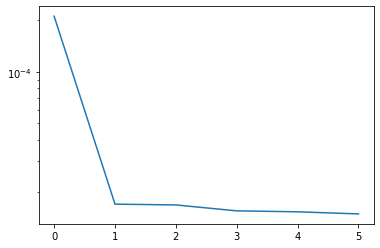

In [99]:
plt.semilogy(costs)

In [132]:
k = 8

n_vals = np.arange(2, 11, 1)
norm_optimal = np.array([])
norm_unoptimal_equi = np.array([])
norm_unoptimal_cheby = np.array([])
norm_piecewise = np.array([])

time_optimal = np.array([])
time_unoptimal_equi = np.array([])
time_unoptimal_cheby = np.array([])
time_piecewise = np.array([])

shape = 2.0

for n in n_vals:
    print("n=", n)
    equidistant = np.linspace(-1,1,n)
    cheb = chebyshev(n)
    eta = np.linspace(-1,1,1000)
    
    unoptimal1 = time.time()
    unoptimal_rbf_equi = f_aprox(equidistant, shape, eta, runge)
    time_unoptimal_equi = np.append(time_unoptimal_equi, time.time()- unoptimal1)
    
    unoptimal2 = time.time()
    unoptimal_rbf_cheb = f_aprox(cheb, shape, eta, runge)
    time_unoptimal_cheby = np.append(time_unoptimal_cheby, time.time()- unoptimal2)
    
    optimal = time.time()
    nodes, optimal_shape,_ ,_= gradient_descent2(equidistant, shape, eta, [-1, 1], runge)
    print("Passed gradient descent stage")
    print("These are the nodes and the shape", nodes, optimal_shape)
    optimal_rbf = f_aprox(nodes, optimal_shape, eta, runge)
    time_optimal = np.append(time_optimal, time.time() - optimal)

    piecewise_time = time.time()
    _, _, infl, twol = piecewise_rbf(8, [-1,1], runge, 4.0, n)
    time_piecewise = np.append(time_piecewise, time.time()-piecewise_time)
            
    norm_optimal = np.append(norm_optimal, twoNorm(runge(eta), optimal_rbf, [-1,1]))
    norm_unoptimal_equi = np.append(norm_unoptimal_equi, twoNorm(runge(eta), unoptimal_rbf_equi, [-1,1]))
    norm_unoptimal_cheby = np.append(norm_unoptimal_cheby, twoNorm(runge(eta), unoptimal_rbf_cheb, [-1,1]))
    norm_piecewise = np.append(norm_piecewise, twol)

n= 2
We are on iteration 5
This is shape 2.0
This is the norm 0.9487611643487147
This is x [-1.  1.]
This alpha got through 2.0
We are on iteration 4
This is shape 1.431661910980793
This is the norm 0.26170531156154614
This is x [ 0.28015288 -0.28015288]
This alpha got through 2.0
We are on iteration 3
This is shape 1.1989418567843202
This is the norm 0.322496741348019
This is x [ 0.61166461 -0.61166461]
This alpha got through 4.0
We are on iteration 2
This is shape 0.7981713007014792
This is the norm 0.054977577396550445
This is x [-0.25535595  0.25535595]
This alpha got through 4.0
We are on iteration 1
This is shape 1.0180024528640916
This is the norm 0.04962677727344429
This is x [-0.2511841  0.2511841]
This alpha got through 4.0
Passed gradient descent stage
These are the nodes and the shape [-0.30843037  0.30843037] 0.8367545524869766
n= 3
We are on iteration 5
This is shape 2.0
This is the norm 0.34615977096211187
This is x [-1.  0.  1.]
This alpha got through 8.54296875
We are 

Text(0, 0.5, 'Two norm')

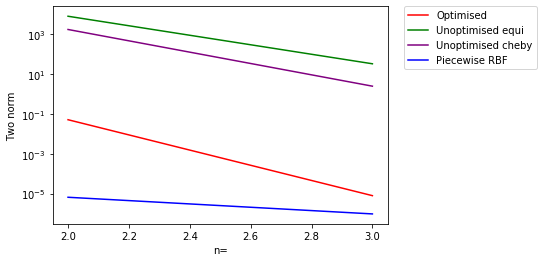

In [133]:
plt.semilogy(n_vals, norm_optimal, 'r', label = "Optimised")
plt.semilogy(n_vals, norm_unoptimal_equi,'g', label = "Unoptimised equi")
plt.semilogy(n_vals, norm_unoptimal_cheby,'purple', label = "Unoptimised cheby")
plt.semilogy(n_vals, norm_piecewise, 'b', label="Piecewise RBF")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Two norm")
plt.savefig(path+"AGD_runge_two_norm_comparison_of_gd_with_others", bbox_extra_artists=[legend,], bbox_inches='tight')

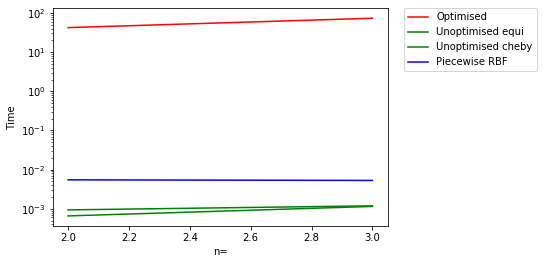

In [134]:
plt.semilogy(n_vals, time_optimal, 'r', label = "Optimised")
plt.semilogy(n_vals, time_unoptimal_equi,'g', label = "Unoptimised equi")
plt.semilogy(n_vals, time_unoptimal_cheby,'purple', label = "Unoptimised cheby")
plt.semilogy(n_vals, time_piecewise, 'b', label="Piecewise RBF")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Time")
plt.savefig(path+"AGD_runge_time_comparison_of_gd_with_others", bbox_extra_artists=[legend,], bbox_inches='tight')

In [136]:
k = 8

n_vals = np.arange(2, 11, 1)
norm_optimal = np.array([])
norm_unoptimal_equi = np.array([])
norm_unoptimal_cheby = np.array([])
norm_piecewise = np.array([])

time_optimal = np.array([])
time_unoptimal_equi = np.array([])
time_unoptimal_cheby = np.array([])
time_piecewise = np.array([])

shape = 2.0

for n in n_vals:
    print("n=", n)
    equidistant = np.linspace(-1,1,n)
    cheb = chebyshev(n)
    eta = np.linspace(-1,1,1000)
    
    unoptimal1 = time.time()
    unoptimal_rbf_equi = f_aprox(equidistant, shape, eta, f_3)
    time_unoptimal_equi = np.append(time_unoptimal_equi, time.time()- unoptimal1)
    
    unoptimal2 = time.time()
    unoptimal_rbf_cheb = f_aprox(cheb, shape, eta, f_3)
    time_unoptimal_cheby = np.append(time_unoptimal_cheby, time.time()- unoptimal2)
    
    optimal = time.time()
    nodes, optimal_shape,_ ,_= gradient_descent2(equidistant, shape, eta, [-1, 1], f_3)
    print("Passed gradient descent stage")
    print("These are the nodes and the shape", nodes, optimal_shape)
    optimal_rbf = f_aprox(nodes, optimal_shape, eta, f_3)
    time_optimal = np.append(time_optimal, time.time() - optimal)

    piecewise_time = time.time()
    _, _, infl, twol = piecewise_rbf(8, [-1,1], f_3, 4.0, n)
    time_piecewise = np.append(time_piecewise, time.time()-piecewise_time)
            
    norm_optimal = np.append(norm_optimal, twoNorm(f_3(eta), optimal_rbf, [-1,1]))
    norm_unoptimal_equi = np.append(norm_unoptimal_equi, twoNorm(f_3(eta), unoptimal_rbf_equi, [-1,1]))
    norm_unoptimal_cheby = np.append(norm_unoptimal_cheby, twoNorm(f_3(eta), unoptimal_rbf_cheb, [-1,1]))
    norm_piecewise = np.append(norm_piecewise, twol)

n= 2
We are on iteration 5
This is shape 2.0
This is the norm 1.1769655944378776
This is x [-1.  1.]
This alpha got through 4.0
We are on iteration 4
This is shape 1.4258836297131103
This is the norm 0.1197301448038331
This is x [ 0.25918508 -3.49986794]
This alpha got through 0.25
We are on iteration 3
This is shape 1.4282221159593502
This is the norm 0.05951245958790356
This is x [ 0.28902613 -3.49986794]
This alpha got through 1.0
We are on iteration 2
This is shape 1.3690922298381256
This is the norm 0.19873340215258753
This is x [ 0.28228897 -3.49986794]
This alpha got through 0.125
We are on iteration 1
This is shape 1.3677642077146681
This is the norm 0.12148343641779372
This is x [ 0.30709512 -3.49986794]
This alpha got through 2.0
Passed gradient descent stage
These are the nodes and the shape [ 0.12081703 -3.49986794] 1.2117726158067101
n= 3
We are on iteration 5
This is shape 2.0
This is the norm 1.2165284149513524
This is x [-1.  0.  1.]
This alpha got through 0.13348388671

Text(0, 0.5, 'Two norm')

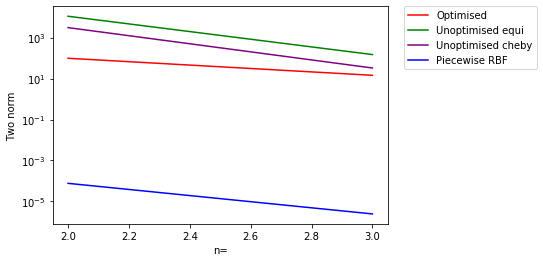

In [139]:
plt.semilogy(n_vals, norm_optimal, 'r', label = "Optimised")
plt.semilogy(n_vals, norm_unoptimal_equi,'g', label = "Unoptimised equi")
plt.semilogy(n_vals, norm_unoptimal_cheby,'purple', label = "Unoptimised cheby")
plt.semilogy(n_vals, norm_piecewise, 'b', label="Piecewise RBF")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Two norm")
plt.savefig(path+"AGD_f3_two_norm_comparison_of_gd_with_others", bbox_extra_artists=[legend,], bbox_inches='tight')

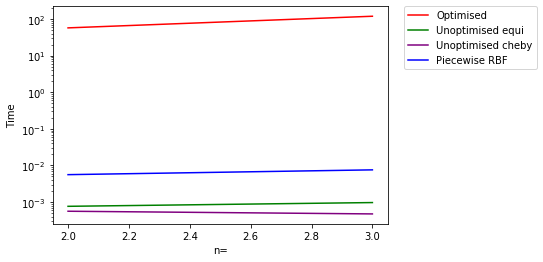

In [140]:
plt.semilogy(n_vals, time_optimal, 'r', label = "Optimised")
plt.semilogy(n_vals, time_unoptimal_equi,'g', label = "Unoptimised equi")
plt.semilogy(n_vals, time_unoptimal_cheby,'purple', label = "Unoptimised cheby")
plt.semilogy(n_vals, time_piecewise, 'b', label="Piecewise RBF")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Time")
plt.savefig(path+"AGD_f3_time_comparison_of_gd_with_others", bbox_extra_artists=[legend,], bbox_inches='tight')

In [228]:
#We explore the range between 10 and 1000 in greater detail
#Arrays tracking the error in max norm of the algorithms
error_optimised = np.array([])
gradients = np.array([])
cost_list = np.array([])

#Arrays for tracking the amount of time spent on each algorithms
time_gd = np.array([])


large_n = np.append(np.array([10]), np.arange(20, 110, 10))
large_n = np.append(large_n, np.arange(200, 1200, 200))
shape = 2.0
for et in large_n:
    n=6
    
    #Known function values
    eta = np.linspace(-1,1,et)
    print("This is N", et)
    
    #Generating nodes
    equidistant = np.linspace(-1,1,n)
    cheb = chebyshev(n)
    
    #Points at which to evaluate the function
    evalu = np.linspace(-1,1, 100)
    
    #Gradient descent
    gd = time.time()
    optimal, shape, grads, costs= gradient_descent2(equidistant, shape, eta, [-1, 1], runge)
    gradients = np.append(gradients, grads)
    cost_list = np.append(cost_list, costs)
    interp_optimal = lagInterp(optimal, runge(optimal), evalu)
    time_gd = np.append(time_gd, time.time()-gd)
   
    error_optimised =np.append(error_optimised, twoNorm(runge(evalu), interp_optimal, [-1,1]))

This is N 10
We are on iteration 20
This is shape 2.0
This is the norm 0.0015865119877844847
This is x [-1.  -0.6 -0.2  0.2  0.6  1. ]
This alpha got through 50.0
We are on iteration 19
This is shape 1.9901509475351473
This is the norm 0.00015481643639799836
This is x [-1.01087423 -0.57976429 -0.25069557  0.25069557  0.57976429  1.01087423]
This alpha got through 50.0
We are on iteration 18
This is shape 1.9851290042491687
This is the norm 0.00011256151351384803
This is x [-1.00826745 -0.57956199 -0.24745304  0.24745304  0.57956199  1.00826745]
This alpha got through 100
We are on iteration 17
This is shape 1.9787403074258563
This is the norm 0.00016811728293976007
This is x [-1.00792522 -0.57758084 -0.25369008  0.25369008  0.57758084  1.00792522]
This alpha got through 50.0
We are on iteration 16
This is shape 1.9734994094600466
This is the norm 0.00010686203702867445
This is x [-1.00577001 -0.57762649 -0.24957319  0.24957319  0.57762649  1.00577001]
This alpha got through 100
We are 

We are on iteration 19
This is shape 1.7266724559211484
This is the norm 0.0003173830592699943
This is x [-0.99203565 -0.5943957  -0.22964871  0.22964871  0.5943957   0.99203565]
This alpha got through 100
We are on iteration 18
This is shape 1.71701919076602
This is the norm 0.00025275929365110785
This is x [-0.98906244 -0.59409582 -0.25081797  0.25081797  0.59409582  0.98906244]
This alpha got through 100
We are on iteration 17
This is shape 1.7118839542018305
This is the norm 0.00020818484659385444
This is x [-0.9882243  -0.59543836 -0.26824628  0.26824628  0.59543836  0.9882243 ]
This alpha got through 100
We are on iteration 16
This is shape 1.7093292951158225
This is the norm 0.00016143300651234833
This is x [-0.98819464 -0.59756311 -0.28270055  0.28270055  0.59756311  0.98819464]
This alpha got through 100
We are on iteration 15
This is shape 1.707827130501936
This is the norm 0.00011126308949706707
This is x [-0.98802511 -0.60000984 -0.29379828  0.29379828  0.60000984  0.988025

We are on iteration 18
This is shape 1.5617365759277078
This is the norm 0.00014875115692281293
This is x [-0.98871728 -0.60184552 -0.21760705  0.21760705  0.60184552  0.98871728]
This alpha got through 100
We are on iteration 17
This is shape 1.5520584100430135
This is the norm 0.0001295342387696265
This is x [-0.98474184 -0.60304452 -0.22443049  0.22443049  0.60304452  0.98474184]
This alpha got through 100
We are on iteration 16
This is shape 1.5435062400147792
This is the norm 0.00011480366835691452
This is x [-0.9815502  -0.60427685 -0.23039879  0.23039879  0.60427685  0.9815502 ]
This alpha got through 100
We are on iteration 15
This is shape 1.5358230816122398
This is the norm 0.0001032253804293835
This is x [-0.97897451 -0.6055046  -0.23571315  0.23571315  0.6055046   0.97897451]
This alpha got through 100
We are on iteration 14
This is shape 1.5288335233148695
This is the norm 9.392500550325319e-05
This is x [-0.97688747 -0.60671099 -0.24051307  0.24051307  0.60671099  0.97688

This alpha got through 100
We are on iteration 17
This is shape 1.360148150976124
This is the norm 4.417341509917261e-05
This is x [-0.99584254 -0.60221762 -0.20302613  0.20302613  0.60221762  0.99584254]
This alpha got through 100
We are on iteration 16
This is shape 1.3563689894751698
This is the norm 4.1782843723325934e-05
This is x [-0.99464893 -0.60287967 -0.20389354  0.20389354  0.60287967  0.99464893]
This alpha got through 100
We are on iteration 15
This is shape 1.35277970466516
This is the norm 3.959845441070321e-05
This is x [-0.99353627 -0.60350833 -0.20470243  0.20470243  0.60350833  0.99353627]
This alpha got through 100
We are on iteration 14
This is shape 1.3493647601798293
This is the norm 3.7595722951766853e-05
This is x [-0.99249701 -0.60410624 -0.20545855  0.20545855  0.60410624  0.99249701]
This alpha got through 100
We are on iteration 13
This is shape 1.3461104389521816
This is the norm 3.575371102435714e-05
This is x [-0.99152451 -0.60467578 -0.20616689  0.20616

We are on iteration 17
This is shape 1.2748344434096217
This is the norm 1.4070203050981323e-05
This is x [-0.99892711 -0.60054665 -0.20045061  0.20045061  0.60054665  0.99892711]
This alpha got through 100
We are on iteration 16
This is shape 1.2735447351854636
This is the norm 1.3594411062921295e-05
This is x [-0.99859177 -0.6007138  -0.20058397  0.20058397  0.6007138   0.99859177]
This alpha got through 100
We are on iteration 15
This is shape 1.2722983223617437
This is the norm 1.3140403681816293e-05
This is x [-0.99826649 -0.600874   -0.20070965  0.20070965  0.600874    0.99826649]
This alpha got through 100
We are on iteration 14
This is shape 1.2710933151353807
This is the norm 1.270687296775196e-05
This is x [-0.9979507  -0.60102758 -0.20082805  0.20082805  0.60102758  0.9979507 ]
This alpha got through 100
We are on iteration 13
This is shape 1.2699279338888199
This is the norm 1.2292612895550093e-05
This is x [-0.99764386 -0.60117483 -0.20093955  0.20093955  0.60117483  0.997

This alpha got through 100
We are on iteration 16
This is shape 1.242880990593617
This is the norm 5.222232740672867e-06
This is x [-0.99926033 -0.60009532 -0.19999773  0.19999773  0.60009532  0.99926033]
This alpha got through 100
We are on iteration 15
This is shape 1.2424258106862724
This is the norm 5.096203000689861e-06
This is x [-0.99908039 -0.60011429 -0.19999269  0.19999269  0.60011429  0.99908039]
This alpha got through 100
We are on iteration 14
This is shape 1.2419835552966216
This is the norm 4.9748627926207525e-06
This is x [-0.99890229 -0.60013146 -0.19998601  0.19998601  0.60013146  0.99890229]
This alpha got through 100
We are on iteration 13
This is shape 1.2415538043160836
This is the norm 4.858032199880855e-06
This is x [-0.99872594 -0.60014688 -0.19997774  0.19997774  0.60014688  0.99872594]
This alpha got through 100
We are on iteration 12
This is shape 1.2411361537154058
This is the norm 4.745539480517104e-06
This is x [-0.99855129 -0.60016062 -0.19996797  0.1999

We are on iteration 16
This is shape 1.231357682132175
This is the norm 2.7918050008697745e-06
This is x [-0.99939984 -0.59990163 -0.19983895  0.19983895  0.59990163  0.99939984]
This alpha got through 100
We are on iteration 15
This is shape 1.2311872594603293
This is the norm 2.76099254467437e-06
This is x [-0.99925129 -0.59987563 -0.19979766  0.19979766  0.59987563  0.99925129]
This alpha got through 100
We are on iteration 14
This is shape 1.2310212712179687
This is the norm 2.7314161843868146e-06
This is x [-0.9991033  -0.59984911 -0.19975599  0.19975599  0.59984911  0.9991033 ]
This alpha got through 100
We are on iteration 13
This is shape 1.2308595889768728
This is the norm 2.703023867239714e-06
This is x [-0.99895587 -0.59982208 -0.19971396  0.19971396  0.59982208  0.99895587]
This alpha got through 100
We are on iteration 12
This is shape 1.2307020883832709
This is the norm 2.6757654128763714e-06
This is x [-0.99880898 -0.59979456 -0.19967159  0.19967159  0.59979456  0.998808

This alpha got through 100
We are on iteration 15
This is shape 1.2269179341565903
This is the norm 2.2830814837450774e-06
This is x [-0.99929723 -0.5997924  -0.19973312  0.19973312  0.5997924   0.99929723]
This alpha got through 100
We are on iteration 14
This is shape 1.2268553652168466
This is the norm 2.2759209428763352e-06
This is x [-0.99915757 -0.59975053 -0.19967976  0.19967976  0.59975053  0.99915757]
This alpha got through 100
We are on iteration 13
This is shape 1.226794230885766
This is the norm 2.2689329602465485e-06
This is x [-0.9990182  -0.59970857 -0.19962641  0.19962641  0.59970857  0.9990182 ]
This alpha got through 100
We are on iteration 12
This is shape 1.2267344924249315
This is the norm 2.26210895624603e-06
This is x [-0.99887912 -0.5996665  -0.19957308  0.19957308  0.5996665   0.99887912]
This alpha got through 100
We are on iteration 11
This is shape 1.2266761122216945
This is the norm 2.2554407856226095e-06
This is x [-0.99874033 -0.59962434 -0.19951977  0.19

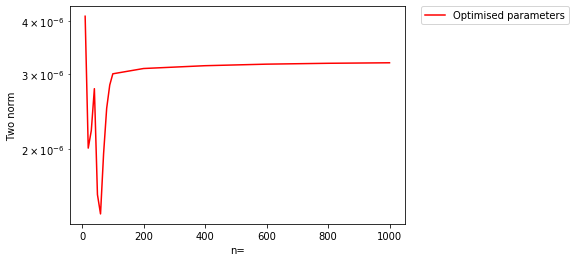

In [230]:
plt.semilogy(large_n, error_optimised, 'r', label = "Optimised parameters")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Two norm")
plt.savefig(path+"norm_large_n_runge", bbox_extra_artists=[legend,], bbox_inches='tight')

In [ ]:
plt.semilogy(large_n, time_optimal, 'r', label = "Optimised parameters")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Time")
plt.savefig(path+"time_large_n_runge", bbox_extra_artists=[legend,], bbox_inches='tight')

In [ ]:
#We explore the range between 10 and 1000 in greater detail
#Arrays tracking the error in max norm of the algorithms
error_optimised = np.array([])
gradients = np.array([])
cost_list = np.array([])

#Arrays for tracking the amount of time spent on each algorithms
time_gd = np.array([])


large_n = np.append(np.array([10]), np.arange(20, 110, 10))
large_n = np.append(large_n, np.arange(200, 1200, 200))
shape = 2.0
for et in large_n:
    n=6
    
    #Known function values
    eta = np.linspace(-1,1,et)
    print("This is N", et)
    
    #Generating nodes
    equidistant = np.linspace(-1,1,n)
    cheb = chebyshev(n)
    
    #Points at which to evaluate the function
    evalu = np.linspace(-1,1, 100)
    
    #Gradient descent
    gd = time.time()
    optimal, shape, grads, costs= gradient_descent2(equidistant, shape, eta, [-1, 1], f_3)
    gradients = np.append(gradients, grads)
    cost_list = np.append(cost_list, costs)
    interp_optimal = lagInterp(optimal, f_3(optimal), evalu)
    time_gd = np.append(time_gd, time.time()-gd)
   
    error_optimised =np.append(error_optimised, twoNorm(f_3(evalu), interp_optimal, [-1,1]))

In [ ]:
plt.semilogy(large_n, norm_optimal, 'r', label = "Optimised parameters")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Two norm")
plt.savefig(path+"norm_large_n_f3", bbox_extra_artists=[legend,], bbox_inches='tight')

In [ ]:
plt.semilogy(large_n, time_optimal, 'r', label = "Optimised parameters")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Time")
plt.savefig(path+"time_large_n_f3", bbox_extra_artists=[legend,], bbox_inches='tight')

In [187]:
#Comparison between RBF interpolation and lagrangian interpolation for Runge
n_vals = np.arange(2, 20, 1)
norm_rbf = np.array([])
norm_lag_equi = np.array([])
norm_lag_cheb = np.array([])
norm_piecewise_lag = np.array([])
norm_piecewise_rbf = np.array([])

time_rbf = np.array([])
time_lag_equi = np.array([])
time_lag_cheb = np.array([])
time_piecewise_lag = np.array([])
time_piecewise_rbf = np.array([])

k=8
shape = 1.8

for n in n_vals:
    print("n=", n)
    x = np.linspace(-1, 1, n)
    cheb = chebyshev(n)
    equidistant = np.linspace(-1,1,n)
    eta = np.linspace(-1,1,1000)
    
    unoptimal = time.time()
    unoptimal_rbf = f_aprox(equidistant, shape, eta, runge)
    time_rbf = np.append(time_rbf, time.time()- unoptimal)
    
    lagr = time.time()
    interp_equidistant = lagInterp(x, runge(x), eta)
    time_lag_equi = np.append(time_lag_equi, time.time()- lagr)
    
    cheby = time.time()
    interp_chebishev = lagInterp(cheb, runge(cheb), eta)
    time_lag_cheb = np.append(time_lag_cheb, time.time()-cheby)
        
    piece = time.time()
    _, _, _, piece_norm = pieceWise(k, [-1,1], runge, n)
    time_piecewise_lag = np.append(time_piecewise_lag, time.time() - piece)

    piecewise_time = time.time()
    _, _, infl, twol = piecewise_rbf(8, [-1,1], runge, 4.0, n)
    time_piecewise_rbf = np.append(time_piecewise_rbf, time.time()-piecewise_time)
            
    norm_lag_equi = np.append(norm_lag_equi, twoNorm(runge(eta), interp_equidistant, [-1,1]))
    norm_lag_cheb = np.append(norm_lag_cheb, twoNorm(runge(eta), interp_chebishev, [-1,1]))
    norm_rbf = np.append(norm_rbf, twoNorm(runge(eta), unoptimal_rbf, [-1,1]))
    norm_piecewise_rbf = np.append(norm_piecewise_rbf, twol)
    norm_piecewise_lag = np.append(norm_piecewise_lag, piece_norm)

n= 2
n= 3
n= 4
n= 5
n= 6
n= 7
n= 8
n= 9
n= 10
n= 11
n= 12
n= 13
n= 14
n= 15
n= 16
n= 17
n= 18
n= 19


Text(0, 0.5, 'Time')

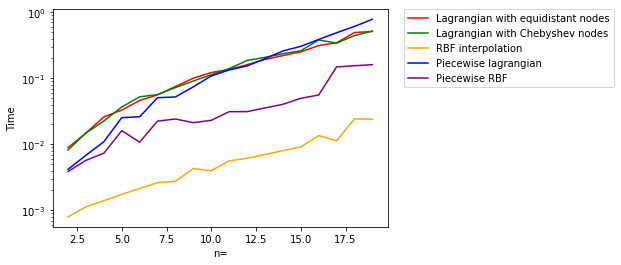

In [188]:
plt.semilogy(n_vals, time_lag_equi, 'r', label = "Lagrangian with equidistant nodes")
plt.semilogy(n_vals, time_lag_cheb,'g', label = "Lagrangian with Chebyshev nodes")
plt.semilogy(n_vals, time_rbf,'orange', label = "RBF interpolation")
plt.semilogy(n_vals, time_piecewise_lag, 'b', label="Piecewise lagrangian")
plt.semilogy(n_vals, time_piecewise_rbf, 'purple', label="Piecewise RBF")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Time")
plt.savefig(path+"rbf_f3_time_comparison_of_gd_with_others333", bbox_extra_artists=[legend,], bbox_inches='tight')

Text(0, 0.5, 'Error')

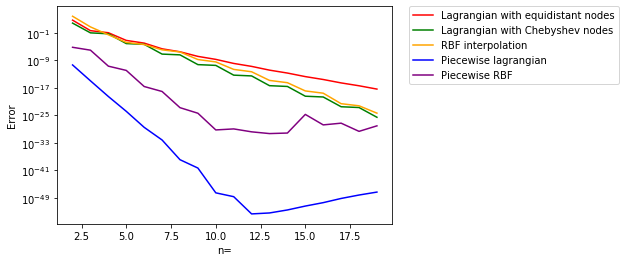

In [189]:
plt.semilogy(n_vals, norm_lag_equi, 'r', label = "Lagrangian with equidistant nodes")
plt.semilogy(n_vals, norm_lag_cheb,'g', label = "Lagrangian with Chebyshev nodes")
plt.semilogy(n_vals, norm_rbf,'orange', label = "RBF interpolation")
plt.semilogy(n_vals, norm_piecewise_lag, 'b', label="Piecewise lagrangian")
plt.semilogy(n_vals, norm_piecewise_rbf, 'purple', label="Piecewise RBF")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Error")
plt.savefig(path+"rbf_f3_time_comparison_of_gd_with_others111", bbox_extra_artists=[legend,], bbox_inches='tight')

In [207]:
#Comparison between RBF interpolation and lagrangian interpolation for f3
n_vals = np.arange(2, 20, 1)
norm_rbf_equi = np.array([])
norm_rbf_cheb = np.array([])
norm_lag_equi = np.array([])
norm_lag_cheb = np.array([])
norm_piecewise_lag = np.array([])
norm_piecewise_rbf = np.array([])

time_rbf_equi = np.array([])
time_rbf_cheb = np.array([])
time_lag_equi = np.array([])
time_lag_cheb = np.array([])
time_piecewise_lag = np.array([])
time_piecewise_rbf = np.array([])

k=8
shape = 1.8

for n in n_vals:
    print("n=", n)
    x = np.linspace(-1, 1, n)
    cheb = chebyshev(n)
    equidistant = np.linspace(-1,1,n)
    eta = np.linspace(-1,1,1000)
    
    unoptimal1 = time.time()
    unoptimal_rbf_equi = f_aprox(equidistant, shape, eta, f_3)
    time_rbf_equi = np.append(time_rbf_equi, time.time()- unoptimal1)
    
    unoptimal2 = time.time()
    unoptimal_rbf_cheb = f_aprox(cheb, shape, eta, f_3)
    time_rbf_cheb = np.append(time_rbf_cheb, time.time()- unoptimal2)
    
    lagr = time.time()
    interp_equidistant = lagInterp(x, f_3(x), eta)
    time_lag_equi = np.append(time_lag_equi, time.time()- lagr)
    
    cheby = time.time()
    interp_chebishev = lagInterp(cheb, f_3(cheb), eta)
    time_lag_cheb = np.append(time_lag_cheb, time.time()-cheby)
        
    piece = time.time()
    _, _, _, piece_norm = pieceWise(k, [-1,1], f_3, n)
    time_piecewise_lag = np.append(time_piecewise_lag, time.time() - piece)

    piecewise_time = time.time()
    _, _, infl, twol = piecewise_rbf(8, [-1,1], f_3, 4.0, n)
    time_piecewise_rbf = np.append(time_piecewise_rbf, time.time()-piecewise_time)
            
    norm_lag_equi = np.append(norm_lag_equi, twoNorm(f_3(eta), interp_equidistant, [-1,1]))
    norm_lag_cheb = np.append(norm_lag_cheb, twoNorm(f_3(eta), interp_chebishev, [-1,1]))
    norm_rbf_equi = np.append(norm_rbf_equi, twoNorm(f_3(eta), unoptimal_rbf_equi, [-1,1]))
    norm_rbf_cheb = np.append(norm_rbf_cheb, twoNorm(f_3(eta), unoptimal_rbf_cheb, [-1,1]))
    norm_piecewise_rbf = np.append(norm_piecewise_rbf, twol)
    norm_piecewise_lag = np.append(norm_piecewise_lag, piece_norm)

n= 2
1
n= 3
2
n= 4
3
n= 5
4
n= 6
5
n= 7
6
n= 8
7
n= 9
8
n= 10
9
n= 11
10
n= 12
11
n= 13
12
n= 14
13
n= 15
14
n= 16
15
n= 17
16
n= 18
17
n= 19
18


Text(0, 0.5, 'Time')

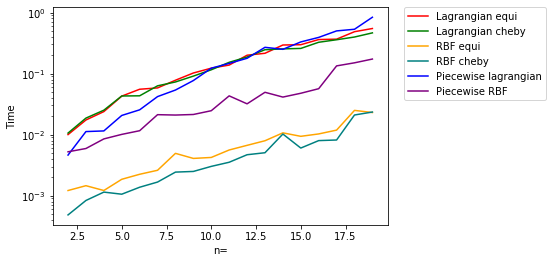

In [208]:
plt.semilogy(n_vals, time_lag_equi, 'r', label = "Lagrangian equi")
plt.semilogy(n_vals, time_lag_cheb,'g', label = "Lagrangian cheby")
plt.semilogy(n_vals, time_rbf_equi,'orange', label = "RBF equi")
plt.semilogy(n_vals, time_rbf_cheb,'teal', label = "RBF cheby")
plt.semilogy(n_vals, time_piecewise_lag, 'b', label="Piecewise lagrangian")
plt.semilogy(n_vals, time_piecewise_rbf, 'purple', label="Piecewise RBF")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Time")
plt.savefig(path+"rbf_f3_time_comparison_of_gd_with_others11", bbox_extra_artists=[legend,], bbox_inches='tight')

Text(0, 0.5, 'Error')

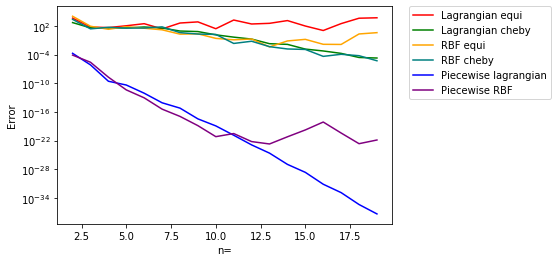

In [209]:
plt.semilogy(n_vals, norm_lag_equi, 'r', label = "Lagrangian equi")
plt.semilogy(n_vals, norm_lag_cheb,'g', label = "Lagrangian cheby")
plt.semilogy(n_vals, norm_rbf_equi,'orange', label = "RBF equi")
plt.semilogy(n_vals, norm_rbf_cheb,'teal', label = "RBF cheby")
plt.semilogy(n_vals, norm_piecewise_lag, 'b', label="Piecewise lagrangian")
plt.semilogy(n_vals, norm_piecewise_rbf, 'purple', label="Piecewise RBF")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Error")
plt.savefig(path+"rbf_f3_time_comparison_of_gd_with_others33", bbox_extra_artists=[legend,], bbox_inches='tight')

A final comment on gradient descent

A weakness of gradient descent which we have found in both this section and the e) is that it is very sensitive to initial conditions. Since the only constraint on the domain of our nodes x is the rather weak $\frac{b-a}{N}$, it is possible to get nodes outside the intended domain of x. A simple example found in our code is with the Runge function with initial conditions of x consisting of equidistant nodes between -1 and 1 and eta consisting of equidistant points between 0 and 1. We observe that the most negative 'optimised' node is slightly smaller than -1. If we make our inital points more ill conditioned by changing eta to be equidistant points between -2 and 2, we get nodes with a value around 45 at the edges, far outside our domain for x. We would therefore argue caution when using this version of gradient descent unless the user has a degree of knowledge or control over initial conditions to avoid undesired results. The results presented in ur paper is under the assumption of ''nice'' initial conditions. This assumption will be stricter in the case of e) 

We see that starting with a few nodes seems to make it easier for the gradient descent algorithm to improve with each step. This is because the cost tends to be higher with fewer nodes as we get a less accurate interpolation, meaning that the gradient descent can take larger steps in the beginning. More nodes means that the alpha needed for the Armijo condition to be met becomes exceedingly small, leading to slow convergence. In some cases the alpha becomes so small that we start getting floating point errors and the algorithm breaks down.